loading results
results loaded
loading results
results loaded


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_80630/311240579.py:182: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


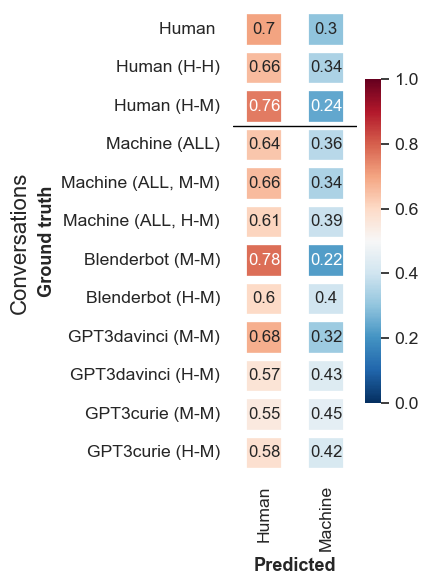

NameError: name 'top1' is not defined

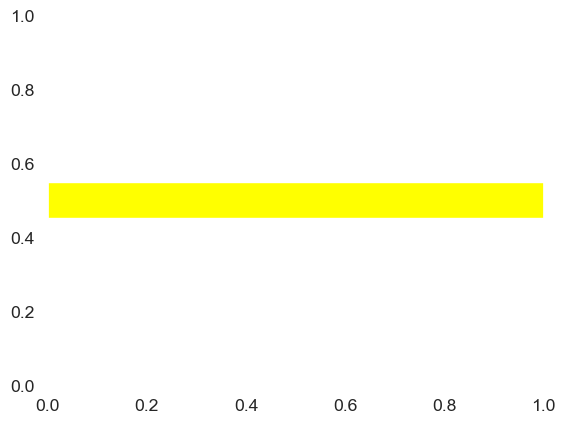

In [1]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols


key ='prolific' #choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots

print('loading results')
filename = TextFilePath + 'HclassH_all.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all.txt'
AI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHHclassH_all.txt'
H_inHH_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_all.txt'
AI_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHAIclassH_all.txt'
H_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_all.txt'
AI_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_all.txt'
AIb_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_all.txt'
AIb_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_all.txt'
AId_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_all.txt'
AId_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_all.txt'
AIc_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_all.txt'
AIc_inHAI_responses_all = np.loadtxt(filename)

print('results loaded')

# load std for top1 accuracy
print('loading results')
filename = TextFilePath + 'AIclassAI_top1std_all.txt'
AI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_top1std_all.txt'
AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_top1std_all.txt'
AI_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_top1std.txt'
AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_top1std.txt'
AId_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_top1std.txt'
AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

top1std = [AI_responses_all_top1std,
AI_inAIAI_responses_all_top1std,
AI_inHAI_responses_all_top1std,
AIb_inAIAI_responses_all_top1std,
AIb_inHAI_responses_all_top1std,
AId_inAIAI_responses_all_top1std,
AId_inHAI_responses_all_top1std,
AIc_inAIAI_responses_all_top1std,
AIc_inHAI_responses_all_top1std]
print('results loaded')

modelist = ['Human ',
           'Human (H-H)',
           'Human (H-M)',
           'Machine (ALL)',
            'Machine (ALL, M-M)',
            'Machine (ALL, H-M)',
            'Blenderbot (M-M)',
            'Blenderbot (H-M)',
            'GPT3davinci (M-M)',
            'GPT3davinci (H-M)',
            'GPT3curie (M-M)',
            'GPT3curie (H-M)',
           ]

plotname = 'human_judge'

###################3compute confusion matrix
result_conf_mat = np.zeros((len(modelist),2),'float32')
result_conf_mat[0][0] = H_responses_all
result_conf_mat[0][1] = 1-H_responses_all
result_conf_mat[1][0] = H_inHH_responses_all
result_conf_mat[1][1] = 1-H_inHH_responses_all
result_conf_mat[2][0] = H_inHAI_responses_all
result_conf_mat[2][1] = 1-H_inHAI_responses_all
result_conf_mat[3][0] = 1-AI_responses_all
result_conf_mat[3][1] = AI_responses_all
result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
result_conf_mat[4][1] = AI_inAIAI_responses_all
result_conf_mat[5][0] = 1-AI_inHAI_responses_all
result_conf_mat[5][1] = AI_inHAI_responses_all
result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
result_conf_mat[6][1] = AIb_inAIAI_responses_all
result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
result_conf_mat[7][1] = AIb_inHAI_responses_all
result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
result_conf_mat[8][1] = AId_inAIAI_responses_all
result_conf_mat[9][0] = 1-AId_inHAI_responses_all
result_conf_mat[9][1] = AId_inHAI_responses_all
result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
result_conf_mat[10][1] = AIc_inAIAI_responses_all
result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
result_conf_mat[11][1] = AIc_inHAI_responses_all
result_conf_mat = np.around(result_conf_mat, decimals=2)

#print(result_conf_mat)

## parameters
fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
from matplotlib import font_manager as fm, rcParams
sn.set(font_scale=1.15)
rcParams['font.size'] = 12
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)

# Plot confusion matrix
df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                  columns=[i for i in ['Human', 'Machine']])
plt.figure(figsize=(2,6))

# Create a heatmap with centered annotations
# ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
#            vmin=0, vmax=1, cbar=False, annot_kws={'ha':'center'})
ax = sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=True, annot_kws={'ha':'center', 'fontproperties': prop_arial}, cbar_kws={"shrink":0.7})

for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=6)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=20)

_=ax.axhline(3, color='black', lw=1)  
#     print(help(_))
plt.xlabel("Predicted",weight='bold',fontproperties=prop_arialbold,fontsize=13)
_ = plt.ylabel("Ground Truth",weight='bold', fontproperties=prop_arialbold,fontsize=13)
plt.text(-3.6, 7.8, "Conversations",fontproperties=prop_arial,fontsize=16,rotation=90)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90,ha='center')

# # Add a black horizontal line after the third row
# _ = ax.axhline(3, color='black', lw=1.5)

plt.xlabel("Predicted")
plt.ylabel("Ground truth")

# Save and display
plt.tight_layout()
plt.savefig(folderpath + '_overall_confmat.eps', format='eps', bbox_inches='tight')
plt.savefig(folderpath + '_overall_confmat.png', bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# data (assuming you already have 'top1', 'top1std', 'modelist', 'result_conf_mat', etc.)
years = list(range(1, len(modelist)-2))
strtask = modelist[3:]

# Figure
fig, ax = plt.subplots()

# Make background white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add yellow rectangle
ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1, facecolor='yellow'))

# Barplot
ax.bar(
    strtask, top1, yerr=top1std,
    align='center', alpha=0.5, ecolor='black', capsize=10,
    color='black', width=0.3
)

# Force spines (axis lines) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Force tick labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Optional: Force plot title to black if you have one
# ax.title.set_color('black')


plt.ylabel('Top-1 Accuracy')
plt.xticks(rotation=90)
plt.ylim(0.3, 1)
plt.xlim(-0.5, 9)

# Draw chance line at 0.5
chancex = np.arange(len(years))
plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')

# Layout
fig.tight_layout()
fig.set_figwidth(3.5)
fig.set_figheight(5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save with white background
plt.savefig(folderpath + '_overall_barplot.png', bbox_inches='tight', facecolor='white')
plt.savefig(folderpath + '_overall_barplot.eps', format='eps', bbox_inches='tight', facecolor='white')

# Save with transparent background if needed
plt.savefig(folderpath + '_overall_barplot_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


# make the conf mats 2x2

### with feedback human judges

loading results
results loaded
2x2 Confusion Matrix:
[[0.72097054 0.27902946]
 [0.6388443  0.3611557 ]]
Standard Errors:
[[0.01 0.01]
 [0.02 0.02]]


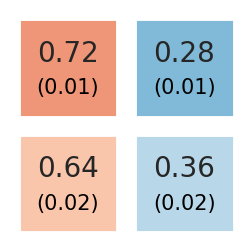

2x2 confusion matrix saved as prolific_2x2overall


In [8]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

key = 'prolific'  # choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_'  # for saving the plots

print('loading results')
# Load the main results
filename = TextFilePath + 'HclassH_all_nofeedback.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all_nofeedback.txt'
AI_responses_all = np.loadtxt(filename)

# Load standard errors
filename = TextFilePath + 'AIclassAI_top1std_all_nofeedback.txt'
AI_responses_all_top1std = np.loadtxt(filename)
filename = TextFilePath + 'HclassH_top1std_all_nofeedback.txt'
H_responses_all_top1std = np.loadtxt(filename)

print('results loaded')

# Create 2x2 confusion matrix using the aggregate results
modelist = ['Human', 'Machine (ALL)']
result_conf_mat = np.array([
    [H_responses_all, 1 - H_responses_all],           # Human ground truth
    [1 - AI_responses_all, AI_responses_all]          # Machine ground truth
])

df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                    columns=[i for i in ['Human', 'Machine']])

# Calculate standard errors (you'll need to calculate h_std based on your data)
stds = np.array([[np.round(H_responses_all_top1std, 2), np.round(H_responses_all_top1std, 2)], [np.round(AI_responses_all_top1std, 2), np.round(AI_responses_all_top1std, 2)]])

print("2x2 Confusion Matrix:")
print(result_conf_mat)
print("Standard Errors:")
print(stds)

# Plot exactly like your colleague's format
plt.figure(figsize=(3, 3))

ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', vmin=0, vmax=1, 
                cbar=False, annot_kws={'ha':'center', 'va':'bottom', 'fontsize': 20})

ax.tick_params(left=False, bottom=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

# Add white lines between cells
for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=15)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=15)

# Add standard error annotations
voffset = 0.23
hoffset = -0.27

for i in range(2):
    for j in range(2):
        plt.text(0.5+j*1+hoffset, 0.5+i*1+voffset, '({})'.format(stds[i,j]), fontsize=15)

plotname = key + '_2x2overall'

plt.savefig(folderpath + '_2x2overall_human_feedback.eps', format='eps', bbox_inches='tight')
#plt.savefig(folderpath + '_2x2overall.pdf', bbox_inches='tight')
plt.savefig(folderpath + '_2x2overall_human_feedback.png', bbox_inches='tight')

plt.show()

print(f"2x2 confusion matrix saved as {plotname}")

### human judges without feedback

In [ ]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

key = 'mturk'  # choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_'  # for saving the plots

print('loading results')
# Load the main results
filename = TextFilePath + 'HclassH_demo.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_demo.txt'
AI_responses_all = np.loadtxt(filename)

# Load standard errors
filename = TextFilePath + 'AIclassAI_top1std_demo.txt'
AI_responses_all_top1std = np.loadtxt(filename)
filename = TextFilePath + 'HclassH_top1std_demo.txt'
H_responses_all_top1std = np.loadtxt(filename)

print('results loaded')

# Create 2x2 confusion matrix using the aggregate results
modelist = ['Human', 'Machine (ALL)']
result_conf_mat = np.array([
    [H_responses_all, 1 - H_responses_all],           # Human ground truth
    [1 - AI_responses_all, AI_responses_all]          # Machine ground truth
])

df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                    columns=[i for i in ['Human', 'Machine']])

# Calculate standard errors (you'll need to calculate h_std based on your data)
stds = np.array([[np.round(H_responses_all_top1std, 2), np.round(H_responses_all_top1std, 2)], [np.round(AI_responses_all_top1std, 2), np.round(AI_responses_all_top1std, 2)]])

print("2x2 Confusion Matrix:")
print(result_conf_mat)
print("Standard Errors:")
print(stds)

# Plot exactly like your colleague's format
plt.figure(figsize=(3, 3))

ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', vmin=0, vmax=1, 
                cbar=False, annot_kws={'ha':'center', 'va':'bottom', 'fontsize': 20})

ax.tick_params(left=False, bottom=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

# Add white lines between cells
for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=15)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=15)

# Add standard error annotations
voffset = 0.23
hoffset = -0.27

for i in range(2):
    for j in range(2):
        plt.text(0.5+j*1+hoffset, 0.5+i*1+voffset, '({})'.format(stds[i,j]), fontsize=15)

plotname = key + '_2x2overall'

plt.savefig(folderpath + '_2x2overall_human_zeroshot.eps', format='eps', bbox_inches='tight')
#plt.savefig(folderpath + '_2x2overall.pdf', bbox_inches='tight')
plt.savefig(folderpath + '_2x2overall_human_zeroshot.png', bbox_inches='tight')

plt.show()

print(f"2x2 confusion matrix saved as {plotname}")

## Separated by topic


Creating combined 5x2 grid of confusion matrices...
Processing science...
Processing technology...
Processing books...
Processing movies...
Processing music...
Processing politics...
Processing general entertainment...
Processing fashion...
Processing sports...
Processing food...


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_42641/2602891341.py:229: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.89, 0.96])  # Leave space for title and colorbar


Page-sized confusion matrices saved to ./plots_elisa/Task3_inlab_combined_confusion_matrices_5x2_page


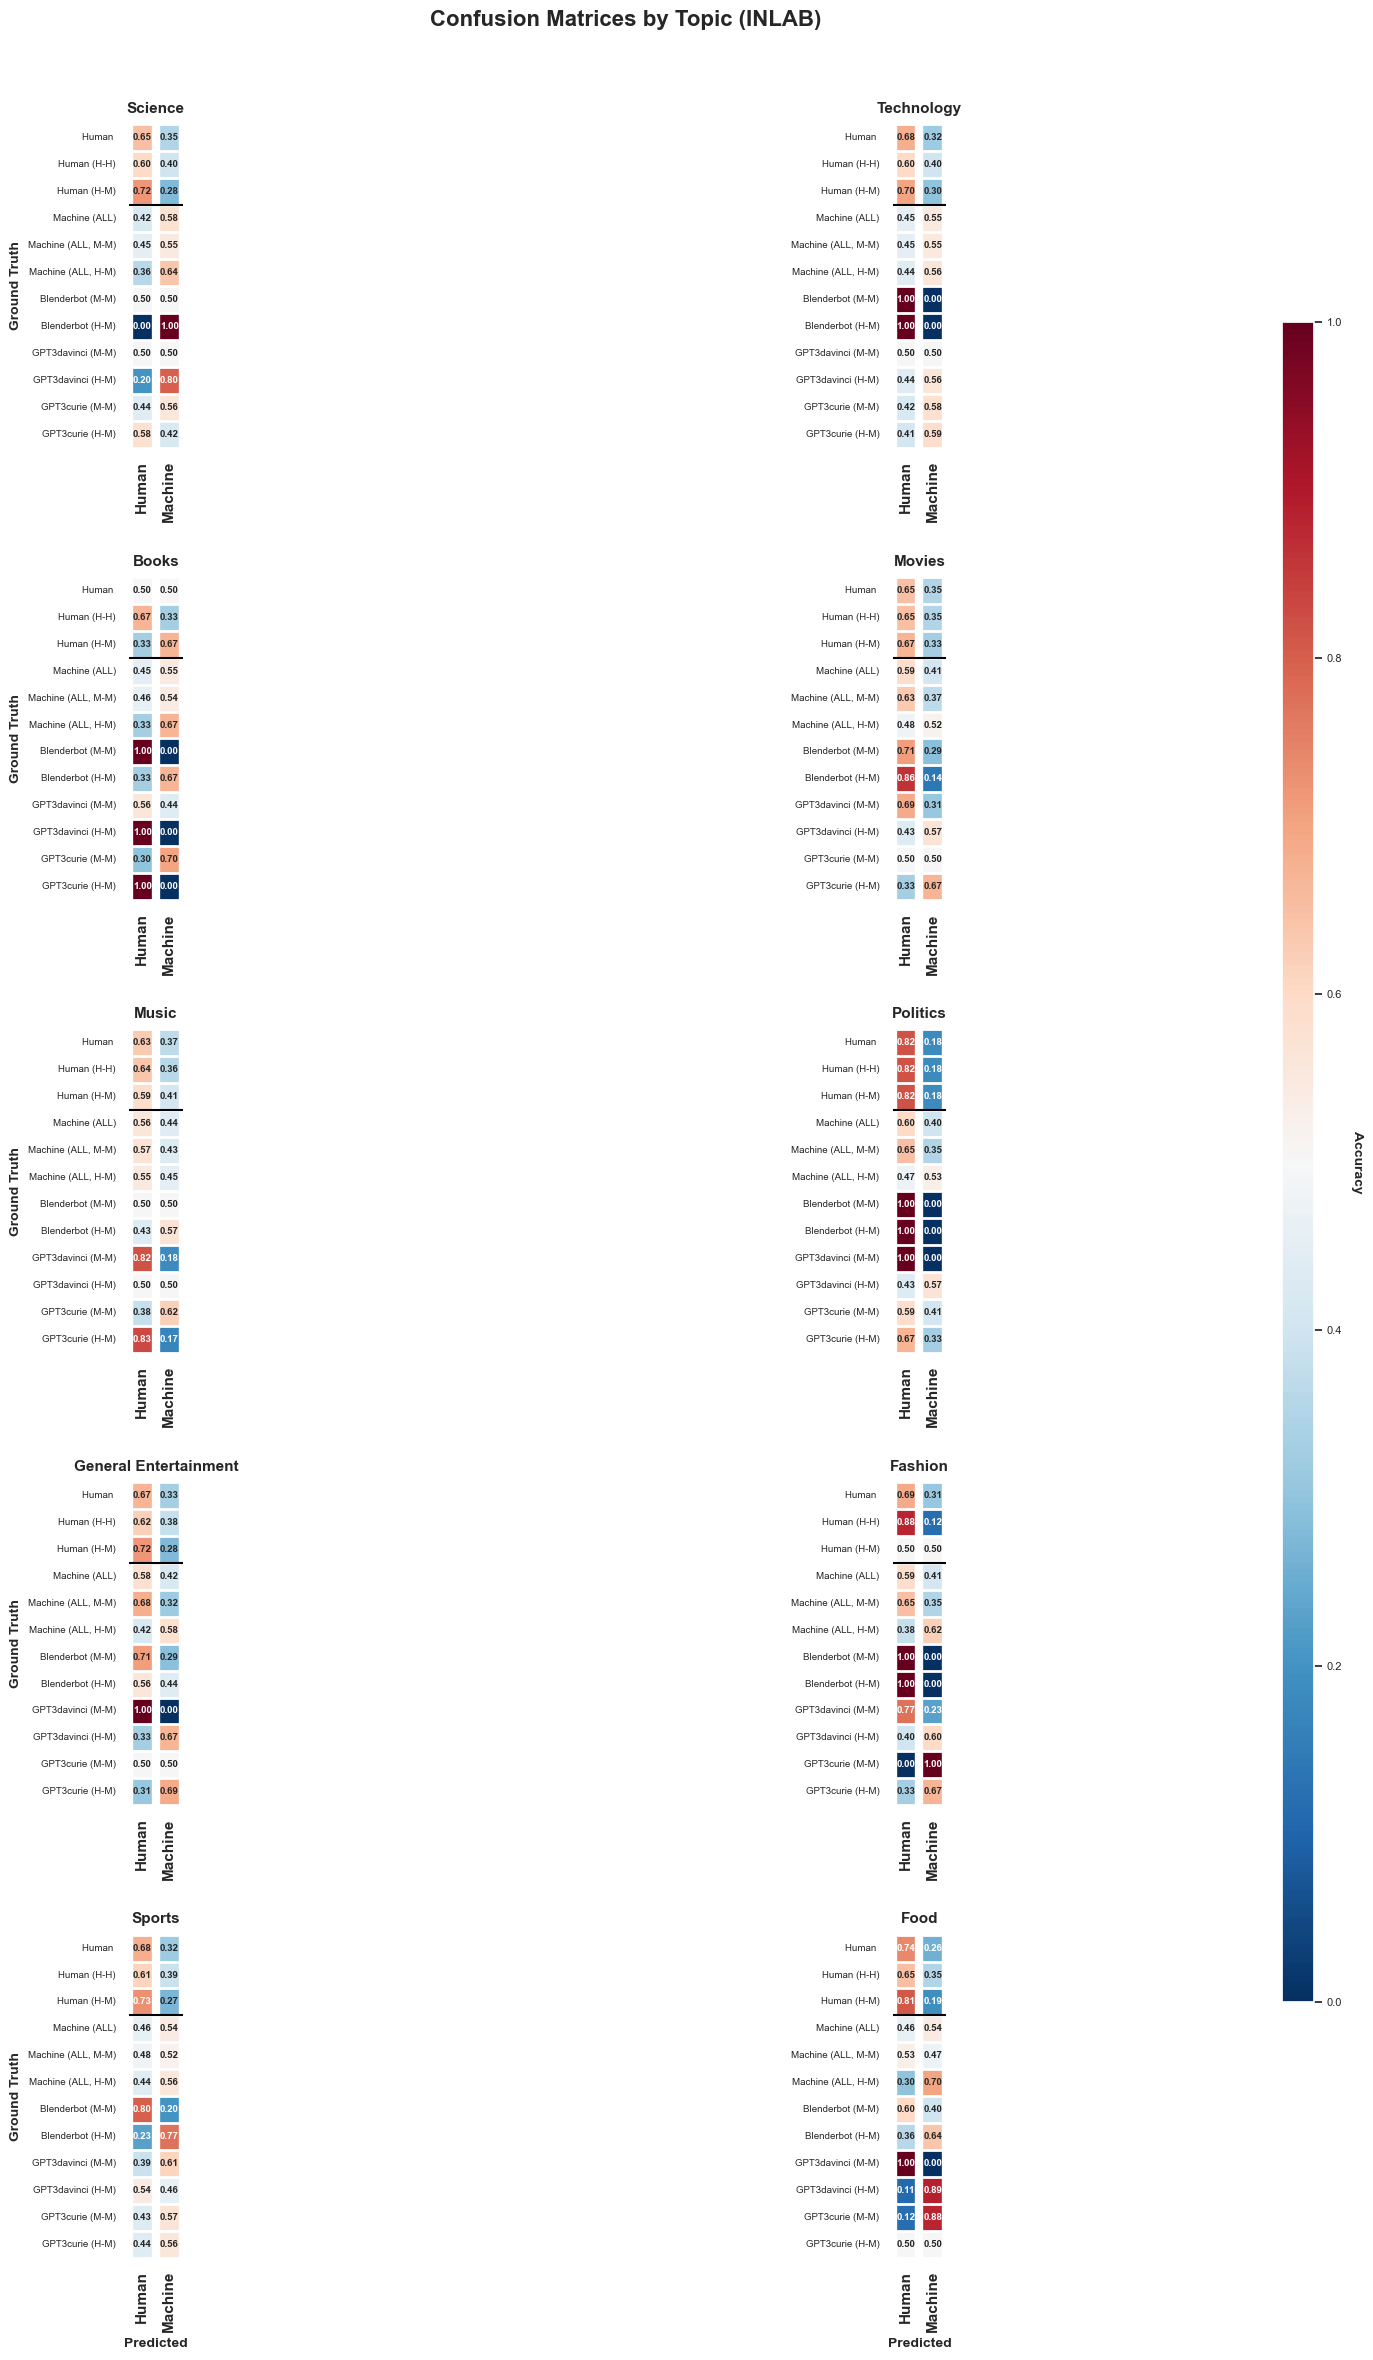


COMBINED CONFUSION MATRIX GRID COMPLETED!
Check ./plots_elisa/ for the combined plot files


In [14]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Define the topics you want to plot
topics = ['science', 'technology', 'books', 'movies', 'music', 'politics', 
          'general entertainment', 'fashion', 'sports', 'food']

key = 'inlab'  # choose from these choices: inlab, mturk, prolific

def load_topic_data(topic, key):
    """Load all the data files for a specific topic"""
    TextFilePath = f'./savedResults_Elisa/Task3_{key}_{topic}_'
    
    data = {}
    
    try:
        # Load main accuracy results
        filename = TextFilePath + 'HclassH_demoall.txt'
        data['H_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI_demoall.txt'
        data['AI_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'HinHHclassH_demoall.txt'
        data['H_inHH_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_demoall.txt'
        data['AI_inAIAI_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'HinHAIclassH_demoall.txt'
        data['H_inHAI_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_demoall.txt'
        data['AI_inHAI_responses_all'] = np.loadtxt(filename)

        # Try to load AI model-specific results (these might not exist for all topics)
        try:
            filename = TextFilePath + 'AIbinAIAIclassAI_demoall.txt'
            data['AIb_inAIAI_responses_all'] = np.loadtxt(filename)

            filename = TextFilePath + 'AIbinHAIclassAI_demoall.txt'
            data['AIb_inHAI_responses_all'] = np.loadtxt(filename)

            filename = TextFilePath + 'AIdinAIAIclassAI_demoall.txt'
            data['AId_inAIAI_responses_all'] = np.loadtxt(filename)

            filename = TextFilePath + 'AIdinHAIclassAI_demoall.txt'
            data['AId_inHAI_responses_all'] = np.loadtxt(filename)

            filename = TextFilePath + 'AIcinAIAIclassAI_demoall.txt'
            data['AIc_inAIAI_responses_all'] = np.loadtxt(filename)

            filename = TextFilePath + 'AIcinHAIclassAI_demoall.txt'
            data['AIc_inHAI_responses_all'] = np.loadtxt(filename)
        except FileNotFoundError:
            # Use default values if specific AI model data is not available
            print(f"Warning: AI model-specific data not found for {topic}, using defaults")
            data['AIb_inAIAI_responses_all'] = data['AI_inAIAI_responses_all']
            data['AIb_inHAI_responses_all'] = data['AI_inHAI_responses_all']
            data['AId_inAIAI_responses_all'] = data['AI_inAIAI_responses_all']
            data['AId_inHAI_responses_all'] = data['AI_inHAI_responses_all']
            data['AIc_inAIAI_responses_all'] = data['AI_inAIAI_responses_all']
            data['AIc_inHAI_responses_all'] = data['AI_inHAI_responses_all']
            
        return data
        
    except FileNotFoundError as e:
        print(f"Error loading data for topic {topic}: {e}")
        return None

def compute_confusion_matrix(data):
    """Compute confusion matrix from data"""
    modelist = ['Human ',
               'Human (H-H)',
               'Human (H-M)',
               'Machine (ALL)',
                'Machine (ALL, M-M)',
                'Machine (ALL, H-M)',
                'Blenderbot (M-M)',
                'Blenderbot (H-M)',
                'GPT3davinci (M-M)',
                'GPT3davinci (H-M)',
                'GPT3curie (M-M)',
                'GPT3curie (H-M)',
               ]

    # Compute confusion matrix
    result_conf_mat = np.zeros((len(modelist),2),'float32')
    result_conf_mat[0][0] = data['H_responses_all']
    result_conf_mat[0][1] = 1-data['H_responses_all']
    result_conf_mat[1][0] = data['H_inHH_responses_all']
    result_conf_mat[1][1] = 1-data['H_inHH_responses_all']
    result_conf_mat[2][0] = data['H_inHAI_responses_all']
    result_conf_mat[2][1] = 1-data['H_inHAI_responses_all']
    result_conf_mat[3][0] = 1-data['AI_responses_all']
    result_conf_mat[3][1] = data['AI_responses_all']
    result_conf_mat[4][0] = 1-data['AI_inAIAI_responses_all']
    result_conf_mat[4][1] = data['AI_inAIAI_responses_all']
    result_conf_mat[5][0] = 1-data['AI_inHAI_responses_all']
    result_conf_mat[5][1] = data['AI_inHAI_responses_all']
    result_conf_mat[6][0] = 1-data['AIb_inAIAI_responses_all']
    result_conf_mat[6][1] = data['AIb_inAIAI_responses_all']
    result_conf_mat[7][0] = 1-data['AIb_inHAI_responses_all']
    result_conf_mat[7][1] = data['AIb_inHAI_responses_all']
    result_conf_mat[8][0] = 1-data['AId_inAIAI_responses_all']
    result_conf_mat[8][1] = data['AId_inAIAI_responses_all']
    result_conf_mat[9][0] = 1-data['AId_inHAI_responses_all']
    result_conf_mat[9][1] = data['AId_inHAI_responses_all']
    result_conf_mat[10][0] = 1-data['AIc_inAIAI_responses_all']
    result_conf_mat[10][1] = data['AIc_inAIAI_responses_all']
    result_conf_mat[11][0] = 1-data['AIc_inHAI_responses_all']
    result_conf_mat[11][1] = data['AIc_inHAI_responses_all']
    result_conf_mat = np.around(result_conf_mat, decimals=2)
    
    return result_conf_mat, modelist

def plot_combined_confusion_matrices(topics, key):
    """Plot all confusion matrices in a 5x2 grid that fits on a page"""
    
    # Set up font properties
    try:
        fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
        fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
        from matplotlib import font_manager as fm, rcParams
        prop_arial = fm.FontProperties(fname=fpath_arial)
        prop_arialbold = fm.FontProperties(fname=fpath_arialbold)
        
        # Set global font properties for compact layout
        sn.set(font_scale=0.8)
        rcParams['font.size'] = 8
    except:
        # Fallback if fonts are not available
        prop_arial = None
        prop_arialbold = None
    
    # Create the main figure with subplots - sized to fit on a page
    fig, axes = plt.subplots(5, 2, figsize=(16, 24))  # Standard page size
    fig.suptitle(f'Confusion Matrices by Topic ({key.upper()})', fontsize=16, fontweight='bold', y=0.98)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    # Load data and create plots for each topic
    for i, topic in enumerate(topics):
        ax = axes_flat[i]
        
        print(f"Processing {topic}...")
        
        # Load data for this topic
        data = load_topic_data(topic, key)
        
        if data is None:
            # If no data, create empty plot with message
            ax.text(0.5, 0.5, f'No data\nfor {topic}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=10, fontweight='bold')
            ax.set_title(topic.replace('_', ' ').title(), fontsize=12, fontweight='bold', pad=10)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        
        # Compute confusion matrix
        result_conf_mat, modelist = compute_confusion_matrix(data)
        
        # Create DataFrame for heatmap
        df_cm = pd.DataFrame(result_conf_mat, 
                           index=[i for i in modelist],
                           columns=['Human', 'Machine'])
        
        # Create heatmap on this subplot - compact but readable
        sns_plot = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
                             vmin=0, vmax=1, cbar=False, ax=ax,
                             annot_kws={'ha':'center', 'fontsize': 7, 'fontweight': 'bold'},
                             fmt='.2f', square=True)
        
        # Add white lines for separation - scaled for compact layout
        for j in range(df_cm.shape[0] + 1):
            ax.axhline(j, color='white', lw=2)
        for j in range(df_cm.shape[1] + 1):
            ax.axvline(j, color='white', lw=6)
        
        # Add black line after third row
        ax.axhline(3, color='black', lw=1.5)
        
        # Set title for this subplot - compact
        ax.set_title(topic.replace('_', ' ').title(), fontsize=11, fontweight='bold', pad=8)
        
        # Set labels (only on outer edges to avoid clutter)
        row = i // 2  # Which row (0-4)
        col = i % 2   # Which column (0-1)
        
        if row == 4:  # Bottom row only
            ax.set_xlabel("Predicted", fontsize=10, fontweight='bold')
        else:
            ax.set_xlabel("")
            
        if col == 0:  # Left column only
            ax.set_ylabel("Ground Truth", fontsize=10, fontweight='bold')
        else:
            ax.set_ylabel("")
        
        # Clean x-axis labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', 
                          fontsize=11, fontweight='bold')
                
        # Compact y-axis labels
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)
        
        # Add "Conversations" label only on the first left plot to save space
        #if i == 0:  # Only on first subplot
        #    ax.text(-0.25, 0.5, "Conversations", fontsize=10, fontweight='bold', 
        #           rotation=90, ha='center', va='center', transform=ax.transAxes)
    
    # Add a compact colorbar
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])  # Narrow colorbar
    
    # Create colorbar from first plot
    dummy_plot = axes_flat[0].collections[0]
    cbar = fig.colorbar(dummy_plot, cax=cbar_ax)
    cbar.set_label('Accuracy', rotation=270, labelpad=15, fontsize=10, fontweight='bold')
    cbar.ax.tick_params(labelsize=8)
    
    # Tight layout optimized for page fitting
    plt.tight_layout(rect=[0, 0, 0.89, 0.96])  # Leave space for title and colorbar
    plt.subplots_adjust(hspace=0.4, wspace=0.2)  # Compact but readable spacing
    
    # Save the combined plot optimized for printing
    output_path = f'./plots_elisa/Task3_{key}_combined_confusion_matrices_5x2_page'
    plt.savefig(output_path + '.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.eps', format='eps', bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.pdf', format='pdf', bbox_inches='tight', facecolor='white')
    
    print(f"Page-sized confusion matrices saved to {output_path}")
    
    plt.show()
    
    return fig

# Create output directory
os.makedirs('./plots_elisa', exist_ok=True)

# Generate the combined plot
print(f"Creating combined 5x2 grid of confusion matrices...")
fig = plot_combined_confusion_matrices(topics, key)

print(f"\n{'='*50}")    
print("COMBINED CONFUSION MATRIX GRID COMPLETED!")
print("Check ./plots_elisa/ for the combined plot files")
print(f"{'='*50}")

Creating simple 2x2 confusion matrices...
Processing science...
Processing technology...
Processing books...
Processing movies...
Processing music...
Processing politics...
Processing general entertainment...
Processing fashion...
Processing sports...
Processing food...


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_55248/1545831917.py:197: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 0.96])


Simple 2x2 confusion matrices saved to ./plots_elisa/Task3_inlab_simple_2x2_confusion_matrices


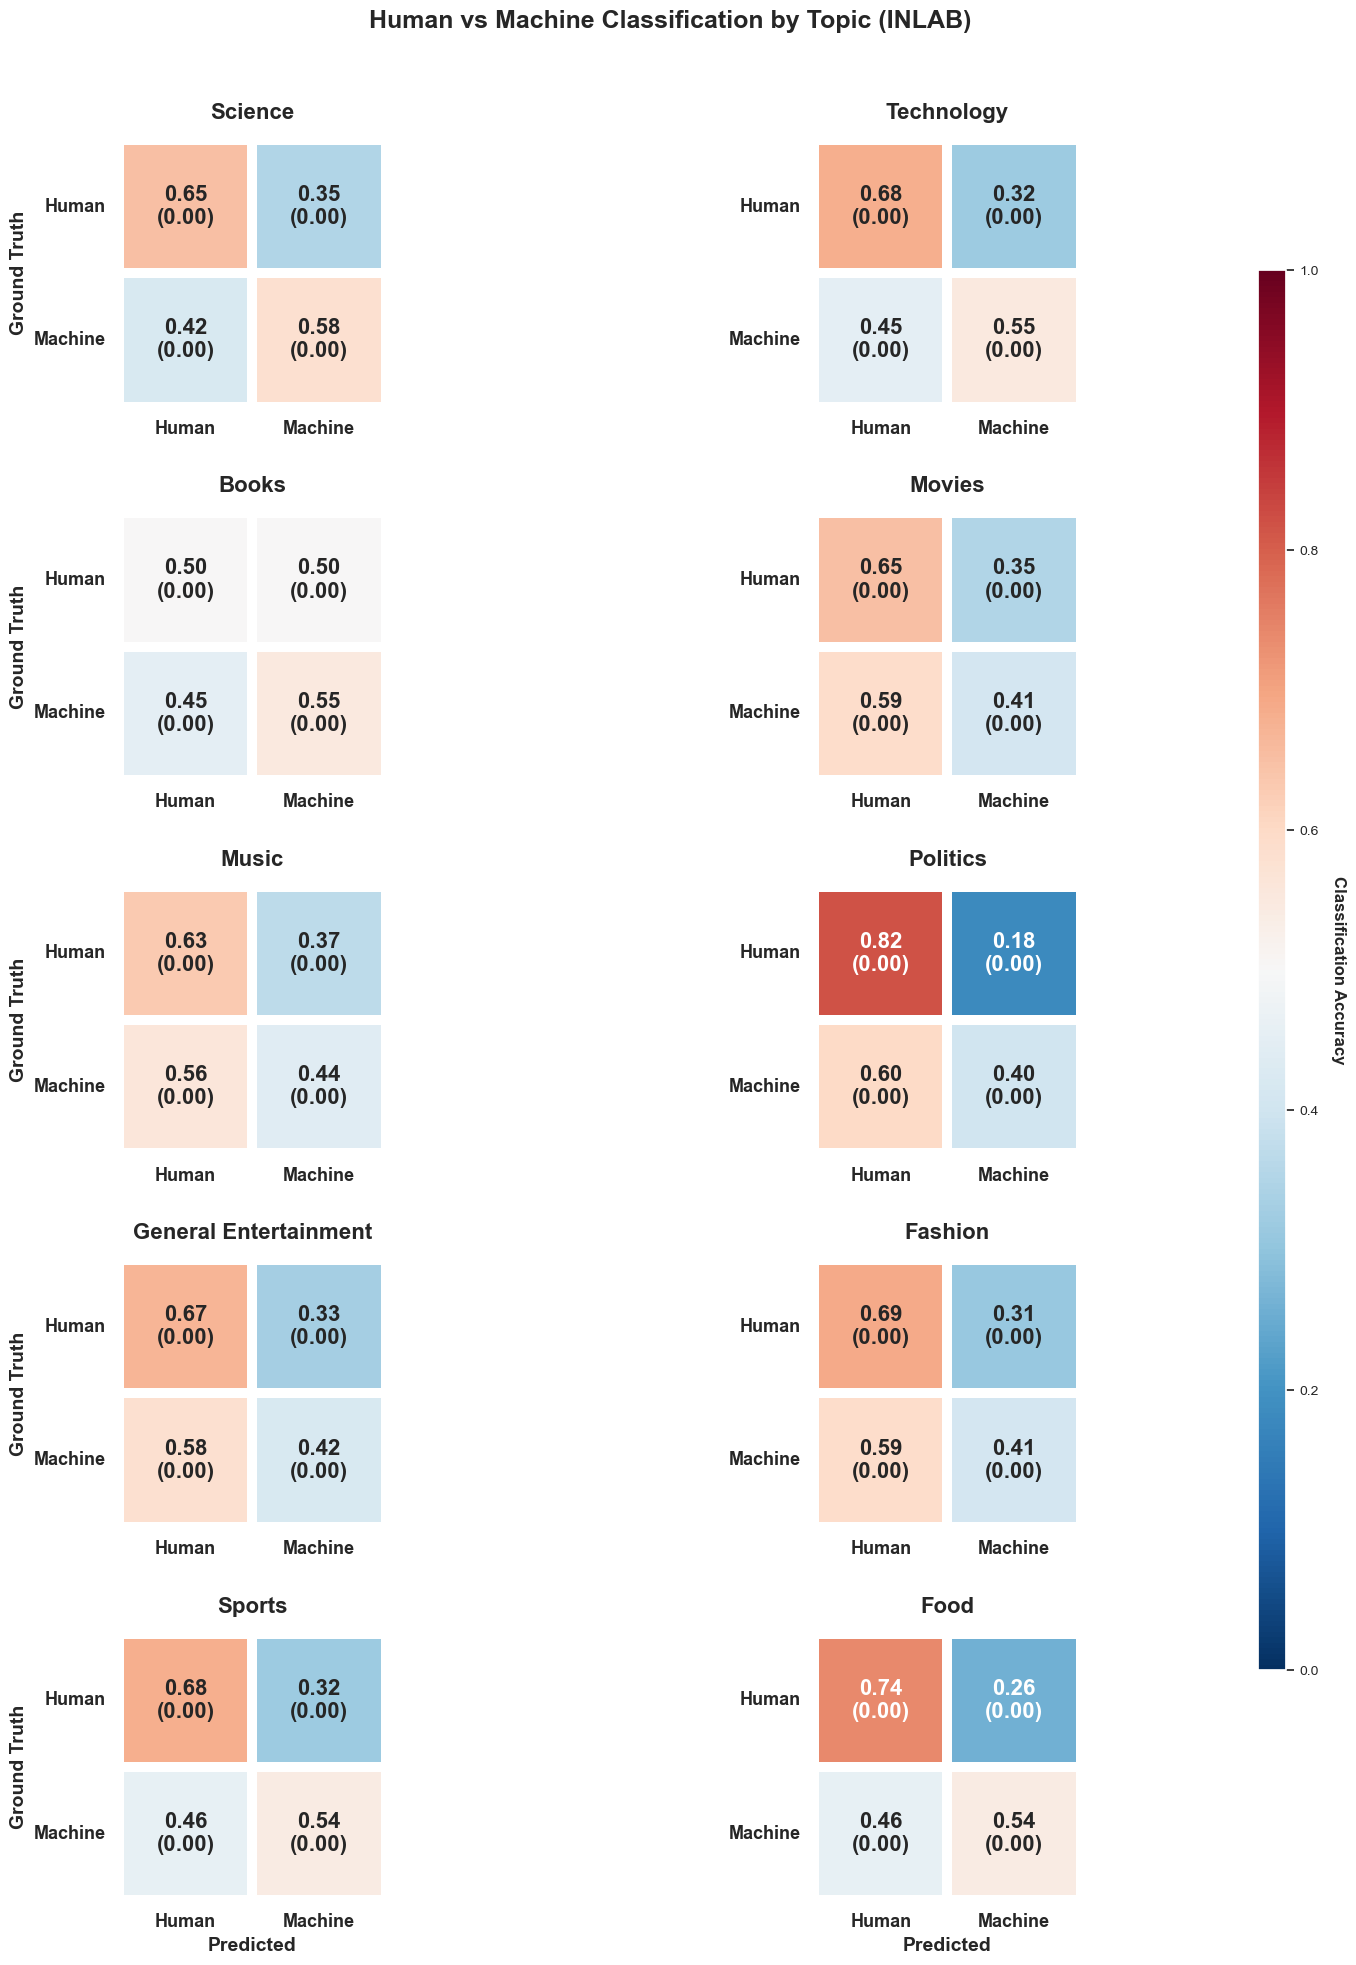


SIMPLE 2x2 CONFUSION MATRICES COMPLETED!
Check ./plots_elisa/ for the combined plot files


In [7]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Define the topics you want to plot
topics = ['science', 'technology', 'books', 'movies', 'music', 'politics', 
          'general entertainment', 'fashion', 'sports', 'food']

key = 'inlab'  # choose from these choices: inlab, mturk, prolific

def load_topic_data(topic, key):
    """Load all the data files for a specific topic"""
    TextFilePath = f'./savedResults_Elisa/Task3_{key}_{topic}_'
    
    data = {}
    
    try:
        # Load main accuracy results (mean values)
        filename = TextFilePath + 'HclassH_demoall.txt'
        data['H_responses_all'] = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI_demoall.txt'
        data['AI_responses_all'] = np.loadtxt(filename)
        
        # Try to load per-image accuracy files for proper std calculation
        try:
            filename = TextFilePath + 'HclassH_acc_per_image.txt'
            data['H_per_image'] = np.loadtxt(filename)
        except FileNotFoundError:
            print(f"Warning: Per-image human data not found for {topic}")
            data['H_per_image'] = None
            
        try:
            filename = TextFilePath + 'AIclassAI_acc_per_image.txt'
            data['AI_per_image'] = np.loadtxt(filename)
        except FileNotFoundError:
            print(f"Warning: Per-image AI data not found for {topic}")
            data['AI_per_image'] = None
            
        return data
        
    except FileNotFoundError as e:
        print(f"Error loading data for topic {topic}: {e}")
        return None

def compute_simple_confusion_matrix(data):
    """Compute simple 2x2 confusion matrix with means and standard deviations"""
    
    # Handle both scalar and array data
    def get_mean_std(mean_data, per_image_data=None):
        # If we have per-image data, use it for proper std calculation
        if per_image_data is not None:
            per_image_array = np.atleast_1d(per_image_data)
            if per_image_array.size > 1:
                mean_val = np.mean(per_image_array)
                std_val = np.std(per_image_array, ddof=1)
                return float(mean_val), float(std_val)
        
        # Fallback to mean data
        mean_array = np.atleast_1d(mean_data)
        if mean_array.size == 1:
            return float(mean_array[0]), 0.0
        else:
            mean_val = np.mean(mean_array)
            std_val = np.std(mean_array, ddof=1) if mean_array.size > 1 else 0.0
            return float(mean_val), float(std_val)
    
    # Calculate means and standard deviations using per-image data when available
    human_mean, human_std = get_mean_std(data['H_responses_all'], data.get('H_per_image'))
    ai_mean, ai_std = get_mean_std(data['AI_responses_all'], data.get('AI_per_image'))
    
    # Create confusion matrix with means
    result_conf_mat = np.zeros((2,2),'float32')
    result_conf_mat[0][0] = human_mean        # Human -> Human (correct)
    result_conf_mat[0][1] = 1 - human_mean    # Human -> Machine (incorrect)
    result_conf_mat[1][0] = 1 - ai_mean       # Machine -> Human (incorrect)
    result_conf_mat[1][1] = ai_mean           # Machine -> Machine (correct)
    
    # Create standard deviation matrix
    std_conf_mat = np.zeros((2,2),'float32')
    std_conf_mat[0][0] = human_std            # Human -> Human std
    std_conf_mat[0][1] = human_std            # Human -> Machine std (same as human std)
    std_conf_mat[1][0] = ai_std               # Machine -> Human std (same as ai std)
    std_conf_mat[1][1] = ai_std               # Machine -> Machine std
    
    result_conf_mat = np.around(result_conf_mat, decimals=2)
    std_conf_mat = np.around(std_conf_mat, decimals=2)
    
    return result_conf_mat, std_conf_mat

def plot_simple_confusion_matrices(topics, key):
    """Plot simple 2x2 confusion matrices in a 5x2 grid"""
    
    # Set up font properties
    try:
        from matplotlib import font_manager as fm, rcParams
        # Set global font properties for compact layout
        sn.set(font_scale=1.0)
        rcParams['font.size'] = 10
    except:
        pass
    
    # Create the main figure with subplots - larger for better spacing
    fig, axes = plt.subplots(5, 2, figsize=(14, 20))
    fig.suptitle(f'Human vs Machine Classification by Topic ({key.upper()})', 
                fontsize=18, fontweight='bold', y=0.98)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    # Load data and create plots for each topic
    for i, topic in enumerate(topics):
        ax = axes_flat[i]
        
        print(f"Processing {topic}...")
        
        # Load data for this topic
        data = load_topic_data(topic, key)
        
        if data is None:
            # If no data, create empty plot with message
            ax.text(0.5, 0.5, f'No data\nfor {topic}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold')
            ax.set_title(topic.replace('_', ' ').title(), fontsize=14, fontweight='bold', pad=15)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        
        # Compute simple 2x2 confusion matrix
        result_conf_mat, std_conf_mat = compute_simple_confusion_matrix(data)
        
        # Create custom annotations with mean and std
        annotations = []
        for row in range(2):
            row_annotations = []
            for col in range(2):
                mean_val = result_conf_mat[row, col]
                std_val = std_conf_mat[row, col]
                annotation = f"{mean_val:.2f}\n({std_val:.2f})"
                row_annotations.append(annotation)
            annotations.append(row_annotations)
        
        # Create DataFrame for heatmap (just for structure)
        df_cm = pd.DataFrame(result_conf_mat, 
                           index=['Human', 'Machine'],
                           columns=['Human', 'Machine'])
        
        # Create heatmap with custom annotations
        sns_plot = sn.heatmap(df_cm, annot=annotations, robust=True, cmap='RdBu_r', 
                             vmin=0, vmax=1, cbar=False, ax=ax,
                             annot_kws={'ha':'center', 'va':'center', 'fontsize': 16, 'fontweight': 'bold'},
                             fmt='', square=True, linewidths=6, linecolor='white')
        
        # Remove the manual white lines since we're using linewidths in heatmap
        
        # Set title for this subplot
        ax.set_title(topic.replace('_', ' ').title(), fontsize=16, fontweight='bold', pad=15)
        
        # Set labels (only on outer edges to avoid clutter)
        row = i // 2  # Which row (0-4)
        col = i % 2   # Which column (0-1)
        
        if row == 4:  # Bottom row only
            ax.set_xlabel("Predicted", fontsize=14, fontweight='bold')
        else:
            ax.set_xlabel("")
            
        if col == 0:  # Left column only
            ax.set_ylabel("Ground Truth", fontsize=14, fontweight='bold')
        else:
            ax.set_ylabel("")
        
        # Set axis labels with larger font
        ax.set_xticklabels(['Human', 'Machine'], rotation=0, ha='center', 
                          fontsize=13, fontweight='bold')
        ax.set_yticklabels(['Human', 'Machine'], rotation=0, fontsize=13, fontweight='bold')
    
    # Add a compact colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    
    # Create colorbar from first plot that has data
    for ax in axes_flat:
        if len(ax.collections) > 0:
            dummy_plot = ax.collections[0]
            break
    
    cbar = fig.colorbar(dummy_plot, cax=cbar_ax)
    cbar.set_label('Classification Accuracy', rotation=270, labelpad=20, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Tight layout with more spacing
    plt.tight_layout(rect=[0, 0, 0.90, 0.96])
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    
    # Save the combined plot
    output_path = f'./plots_elisa/Task3_{key}_simple_2x2_confusion_matrices'
    plt.savefig(output_path + '.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.eps', format='eps', bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.pdf', format='pdf', bbox_inches='tight', facecolor='white')
    
    print(f"Simple 2x2 confusion matrices saved to {output_path}")
    
    plt.show()
    
    return fig

# Create output directory
os.makedirs('./plots_elisa', exist_ok=True)

# Generate the combined plot
print(f"Creating simple 2x2 confusion matrices...")
fig = plot_simple_confusion_matrices(topics, key)

print(f"\n{'='*50}")    
print("SIMPLE 2x2 CONFUSION MATRICES COMPLETED!")
print("Check ./plots_elisa/ for the combined plot files")
print(f"{'='*50}")

Creating simple 2x2 confusion matrices...

Processing science...
Loaded Human accuracy for science: 0.5265486725663717
Loaded AI accuracy for science: 0.5632911392405063
Loaded Human std for science: 0.023539779185110524
Loaded AI std for science: 0.02446835253557416
Human: mean=0.527, std=0.024
AI: mean=0.563, std=0.024

Processing technology...
Loaded Human accuracy for technology: 0.6517857142857143
Loaded AI accuracy for technology: 0.5352112676056338
Loaded Human std for technology: 0.03280324458303289
Loaded AI std for technology: 0.039667905945869664
Human: mean=0.652, std=0.033
AI: mean=0.535, std=0.040

Processing books...
Loaded Human accuracy for books: 0.47368421052631576
Loaded AI accuracy for books: 0.48739495798319327
Loaded Human std for books: 0.05724512619925919
Loaded AI std for books: 0.06400106011391703
Human: mean=0.474, std=0.057
AI: mean=0.487, std=0.064

Processing movies...
Loaded Human accuracy for movies: 0.5943396226415094
Loaded AI accuracy for movies: 0.4

/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_55248/85852322.py:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.90, 0.96])


Simple 2x2 confusion matrices saved to ./plots_elisa/Task3_mturk_simple_2x2_confusion_matrices


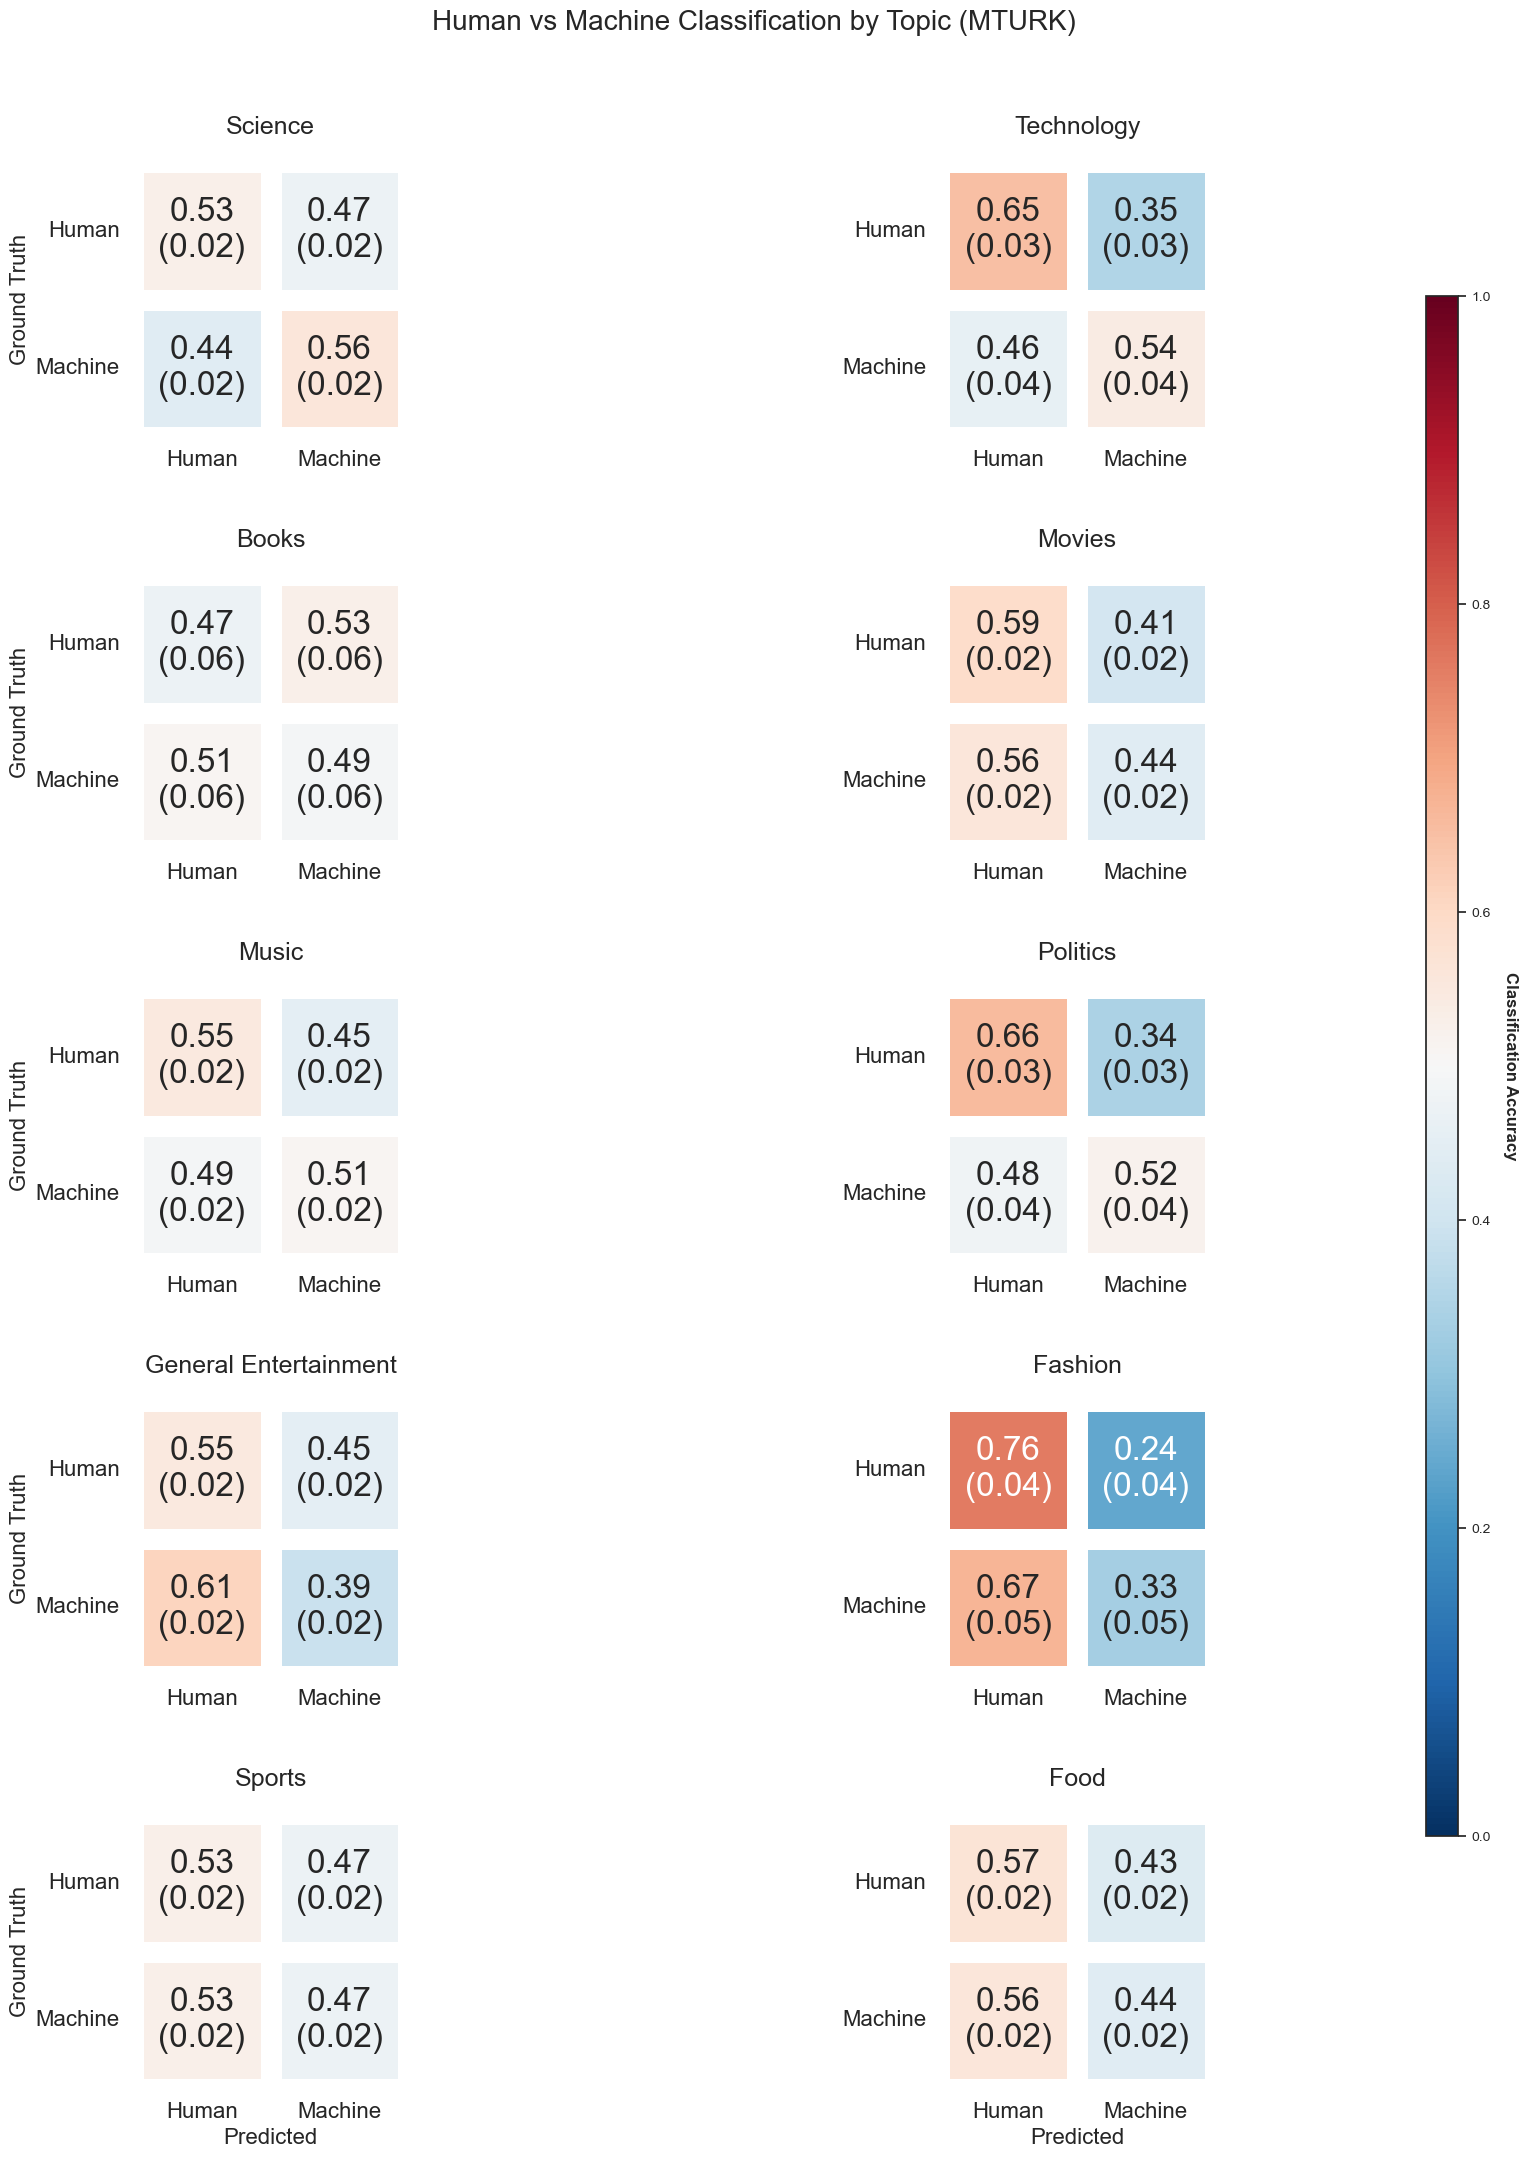


SIMPLE 2x2 CONFUSION MATRICES COMPLETED!
Check ./plots_elisa/ for the combined plot files


In [11]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Define the topics you want to plot
topics = ['science', 'technology', 'books', 'movies', 'music', 'politics', 
          'general entertainment', 'fashion', 'sports', 'food']

key = 'mturk'  # choose from these choices: inlab, mturk, prolific

def load_topic_data(topic, key):
    """Load all the data files for a specific topic including bootstrapped standard deviations"""
    TextFilePath = f'./savedResults_Elisa/Task3_{key}_{topic}_'
    
    data = {}
    
    try:
        # Load main accuracy results (mean values)
        filename = TextFilePath + 'HclassH_demoall.txt'
        data['H_mean'] = np.loadtxt(filename)
        print(f"Loaded Human accuracy for {topic}: {data['H_mean']}")

        filename = TextFilePath + 'AIclassAI_demoall.txt'
        data['AI_mean'] = np.loadtxt(filename)
        print(f"Loaded AI accuracy for {topic}: {data['AI_mean']}")
        
        # Load bootstrapped standard deviations
        try:
            filename = TextFilePath + 'HclassH_top1std_demoall.txt'
            data['H_std'] = np.loadtxt(filename)
            print(f"Loaded Human std for {topic}: {data['H_std']}")
        except FileNotFoundError:
            print(f"Warning: Human std data not found for {topic}")
            data['H_std'] = 0.0
            
        try:
            filename = TextFilePath + 'AIclassAI_top1std_demoall.txt'
            data['AI_std'] = np.loadtxt(filename)
            print(f"Loaded AI std for {topic}: {data['AI_std']}")
        except FileNotFoundError:
            print(f"Warning: AI std data not found for {topic}")
            data['AI_std'] = 0.0
        
        # Also load the old per-image data for backup (optional)
        try:
            filename = TextFilePath + 'HclassH_demoall_acc_per_image.txt'
            data['H_per_image'] = np.loadtxt(filename)
        except FileNotFoundError:
            data['H_per_image'] = None
            
        try:
            filename = TextFilePath + 'AIclassAI_demoall_acc_per_image.txt'
            data['AI_per_image'] = np.loadtxt(filename)
        except FileNotFoundError:
            data['AI_per_image'] = None
            
        return data
        
    except FileNotFoundError as e:
        print(f"Error loading data for topic {topic}: {e}")
        return None

def compute_simple_confusion_matrix(data):
    """Compute simple 2x2 confusion matrix with means and standard deviations"""
    
    # Extract means and stds directly from loaded data
    def get_scalar_value(value):
        """Convert numpy array to scalar if needed"""
        if isinstance(value, np.ndarray):
            return float(value.item()) if value.size == 1 else float(np.mean(value))
        return float(value)
    
    # Use the loaded bootstrapped standard deviations
    human_mean = get_scalar_value(data['H_mean'])
    human_std = get_scalar_value(data.get('H_std', 0.0))
    ai_mean = get_scalar_value(data['AI_mean'])
    ai_std = get_scalar_value(data.get('AI_std', 0.0))
    
    print(f"Human: mean={human_mean:.3f}, std={human_std:.3f}")
    print(f"AI: mean={ai_mean:.3f}, std={ai_std:.3f}")
    
    # Create confusion matrix with means
    result_conf_mat = np.zeros((2,2),'float32')
    result_conf_mat[0][0] = human_mean        # Human -> Human (correct)
    result_conf_mat[0][1] = 1 - human_mean    # Human -> Machine (incorrect)
    result_conf_mat[1][0] = 1 - ai_mean       # Machine -> Human (incorrect)
    result_conf_mat[1][1] = ai_mean           # Machine -> Machine (correct)
    
    # Create standard deviation matrix
    std_conf_mat = np.zeros((2,2),'float32')
    std_conf_mat[0][0] = human_std            # Human -> Human std
    std_conf_mat[0][1] = human_std            # Human -> Machine std (same as human std)
    std_conf_mat[1][0] = ai_std               # Machine -> Human std (same as ai std)
    std_conf_mat[1][1] = ai_std               # Machine -> Machine std
    
    result_conf_mat = np.around(result_conf_mat, decimals=2)
    std_conf_mat = np.around(std_conf_mat, decimals=2)
    
    return result_conf_mat, std_conf_mat

def plot_simple_confusion_matrices(topics, key):
    """Plot simple 2x2 confusion matrices in a 5x2 grid"""
    
    # Set up font properties to match your example
    try:
        from matplotlib import font_manager as fm, rcParams
        # Set global font properties for clean styling
        sn.set_style("white")
        rcParams['font.family'] = 'sans-serif'
        rcParams['font.size'] = 12
    except:
        pass
    
    # Create the main figure with subplots - adjusted for better styling
    fig, axes = plt.subplots(5, 2, figsize=(16, 22))
    fig.suptitle(f'Human vs Machine Classification by Topic ({key.upper()})', 
                fontsize=20, fontweight='normal', y=0.98)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    # Load data and create plots for each topic
    for i, topic in enumerate(topics):
        ax = axes_flat[i]
        
        print(f"\nProcessing {topic}...")
        
        # Load data for this topic
        data = load_topic_data(topic, key)
        
        if data is None:
            # If no data, create empty plot with message
            ax.text(0.5, 0.5, f'No data\nfor {topic}', 
                   ha='center', va='center', transform=ax.transAxes,
                   fontsize=12, fontweight='bold')
            ax.set_title(topic.replace('_', ' ').title(), fontsize=14, fontweight='bold', pad=15)
            ax.set_xticks([])
            ax.set_yticks([])
            continue
        
        # Compute simple 2x2 confusion matrix
        result_conf_mat, std_conf_mat = compute_simple_confusion_matrix(data)
        
        # Create custom annotations with mean and std
        annotations = []
        for row in range(2):
            row_annotations = []
            for col in range(2):
                mean_val = result_conf_mat[row, col]
                std_val = std_conf_mat[row, col]
                annotation = f"{mean_val:.2f}\n({std_val:.2f})"
                row_annotations.append(annotation)
            annotations.append(row_annotations)
        
        # Create DataFrame for heatmap (just for structure)
        df_cm = pd.DataFrame(result_conf_mat, 
                           index=['Human', 'Machine'],
                           columns=['Human', 'Machine'])
        
        # Create heatmap with custom annotations - styled to match your example
        sns_plot = sn.heatmap(df_cm, annot=annotations, robust=True, cmap='RdBu_r', 
                             vmin=0, vmax=1, cbar=False, ax=ax,
                             annot_kws={'ha':'center', 'va':'center', 'fontsize': 24, 'fontweight': 'normal', 'fontfamily': 'sans-serif'},
                             fmt='', square=True, linewidths=14, linecolor='white')
        
        # Set title for this subplot - styled to match example
        ax.set_title(topic.replace('_', ' ').title(), fontsize=18, fontweight='normal', pad=20)
        
        # Set labels (only on outer edges to avoid clutter)
        row = i // 2  # Which row (0-4)
        col = i % 2   # Which column (0-1)
        
        if row == 4:  # Bottom row only
            ax.set_xlabel("Predicted", fontsize=16, fontweight='normal')
        else:
            ax.set_xlabel("")
            
        if col == 0:  # Left column only
            ax.set_ylabel("Ground Truth", fontsize=16, fontweight='normal')
        else:
            ax.set_ylabel("")
        
        # Set axis labels with larger font to match example
        ax.set_xticklabels(['Human', 'Machine'], rotation=0, ha='center', 
                          fontsize=16, fontweight='normal')
        ax.set_yticklabels(['Human', 'Machine'], rotation=0, fontsize=16, fontweight='normal')
    
    # Add a compact colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    
    # Create colorbar from first plot that has data
    for ax in axes_flat:
        if len(ax.collections) > 0:
            dummy_plot = ax.collections[0]
            break
    
    cbar = fig.colorbar(dummy_plot, cax=cbar_ax)
    cbar.set_label('Classification Accuracy', rotation=270, labelpad=20, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Tight layout with spacing optimized for the new styling
    plt.tight_layout(rect=[0, 0, 0.90, 0.96])
    plt.subplots_adjust(hspace=0.5, wspace=0.35)
    
    # Save the combined plot
    output_path = f'./plots_elisa/Task3_{key}_simple_2x2_confusion_matrices'
    plt.savefig(output_path + '.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.eps', format='eps', bbox_inches='tight', facecolor='white')
    plt.savefig(output_path + '.pdf', format='pdf', bbox_inches='tight', facecolor='white')
    
    print(f"Simple 2x2 confusion matrices saved to {output_path}")
    
    plt.show()
    
    return fig

# Create output directory
os.makedirs('./plots_elisa', exist_ok=True)

# Generate the combined plot
print(f"Creating simple 2x2 confusion matrices...")
fig = plot_simple_confusion_matrices(topics, key)

print(f"\n{'='*50}")    
print("SIMPLE 2x2 CONFUSION MATRICES COMPLETED!")
print("Check ./plots_elisa/ for the combined plot files")
print(f"{'='*50}")

## With trials with feedback

loading results
results loaded
loading results
results loaded


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_80630/3177416883.py:182: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


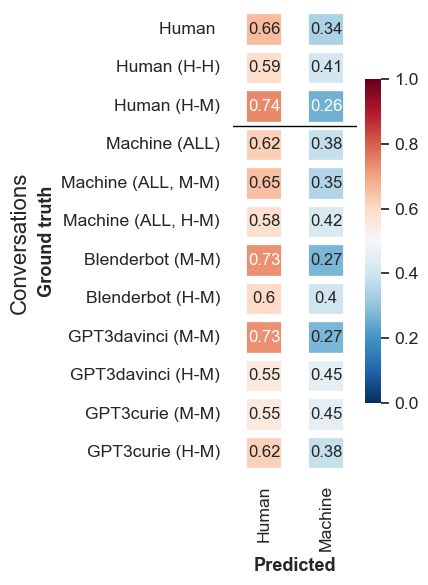

NameError: name 'top1' is not defined

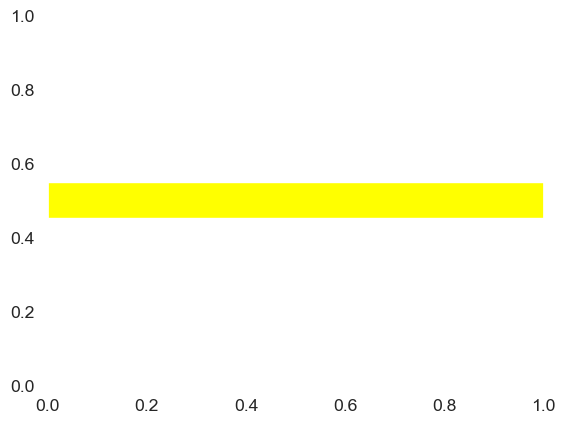

In [2]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols


key ='prolific' #choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots

print('loading results')
filename = TextFilePath + 'HclassH_all_feedback.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all_feedback.txt'
AI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHHclassH_all_feedback.txt'
H_inHH_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_all_feedback.txt'
AI_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHAIclassH_all_feedback.txt'
H_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_all_feedback.txt'
AI_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_all_feedback.txt'
AIb_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_all_feedback.txt'
AIb_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_all_feedback.txt'
AId_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_all_feedback.txt'
AId_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_all_feedback.txt'
AIc_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_all_feedback.txt'
AIc_inHAI_responses_all = np.loadtxt(filename)

print('results loaded')

# load std for top1 accuracy
print('loading results')
filename = TextFilePath + 'AIclassAI_top1std_all_feedback.txt'
AI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_top1std_all_feedback.txt'
AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_top1std_all_feedback.txt'
AI_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_top1std_feedback.txt'
AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_top1std_feedback.txt'
AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_top1std_feedback.txt'
AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_top1std_feedback.txt'
AId_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_top1std_feedback.txt'
AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_top1std_feedback.txt'
AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

top1std = [AI_responses_all_top1std,
AI_inAIAI_responses_all_top1std,
AI_inHAI_responses_all_top1std,
AIb_inAIAI_responses_all_top1std,
AIb_inHAI_responses_all_top1std,
AId_inAIAI_responses_all_top1std,
AId_inHAI_responses_all_top1std,
AIc_inAIAI_responses_all_top1std,
AIc_inHAI_responses_all_top1std]
print('results loaded')

modelist = ['Human ',
           'Human (H-H)',
           'Human (H-M)',
           'Machine (ALL)',
            'Machine (ALL, M-M)',
            'Machine (ALL, H-M)',
            'Blenderbot (M-M)',
            'Blenderbot (H-M)',
            'GPT3davinci (M-M)',
            'GPT3davinci (H-M)',
            'GPT3curie (M-M)',
            'GPT3curie (H-M)',
           ]

plotname = 'human_judge'

###################3compute confusion matrix
result_conf_mat = np.zeros((len(modelist),2),'float32')
result_conf_mat[0][0] = H_responses_all
result_conf_mat[0][1] = 1-H_responses_all
result_conf_mat[1][0] = H_inHH_responses_all
result_conf_mat[1][1] = 1-H_inHH_responses_all
result_conf_mat[2][0] = H_inHAI_responses_all
result_conf_mat[2][1] = 1-H_inHAI_responses_all
result_conf_mat[3][0] = 1-AI_responses_all
result_conf_mat[3][1] = AI_responses_all
result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
result_conf_mat[4][1] = AI_inAIAI_responses_all
result_conf_mat[5][0] = 1-AI_inHAI_responses_all
result_conf_mat[5][1] = AI_inHAI_responses_all
result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
result_conf_mat[6][1] = AIb_inAIAI_responses_all
result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
result_conf_mat[7][1] = AIb_inHAI_responses_all
result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
result_conf_mat[8][1] = AId_inAIAI_responses_all
result_conf_mat[9][0] = 1-AId_inHAI_responses_all
result_conf_mat[9][1] = AId_inHAI_responses_all
result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
result_conf_mat[10][1] = AIc_inAIAI_responses_all
result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
result_conf_mat[11][1] = AIc_inHAI_responses_all
result_conf_mat = np.around(result_conf_mat, decimals=2)

#print(result_conf_mat)

## parameters
fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
from matplotlib import font_manager as fm, rcParams
sn.set(font_scale=1.15)
rcParams['font.size'] = 12
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)

# Plot confusion matrix
df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                  columns=[i for i in ['Human', 'Machine']])
plt.figure(figsize=(2,6))

# Create a heatmap with centered annotations
# ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
#            vmin=0, vmax=1, cbar=False, annot_kws={'ha':'center'})
ax = sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=True, annot_kws={'ha':'center', 'fontproperties': prop_arial}, cbar_kws={"shrink":0.7})

for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=6)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=20)

_=ax.axhline(3, color='black', lw=1)  
#     print(help(_))
plt.xlabel("Predicted",weight='bold',fontproperties=prop_arialbold,fontsize=13)
_ = plt.ylabel("Ground Truth",weight='bold', fontproperties=prop_arialbold,fontsize=13)
plt.text(-3.6, 7.8, "Conversations",fontproperties=prop_arial,fontsize=16,rotation=90)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90,ha='center')

# # Add a black horizontal line after the third row
# _ = ax.axhline(3, color='black', lw=1.5)

plt.xlabel("Predicted")
plt.ylabel("Ground truth")

# Save and display
plt.tight_layout()
plt.savefig(folderpath + '_overall_confmat_feedback.eps', format='eps', bbox_inches='tight')
plt.savefig(folderpath + '_overall_confmat_feedback.png', bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# data (assuming you already have 'top1', 'top1std', 'modelist', 'result_conf_mat', etc.)
years = list(range(1, len(modelist)-2))
strtask = modelist[3:]

# Figure
fig, ax = plt.subplots()

# Make background white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add yellow rectangle
ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1, facecolor='yellow'))

# Barplot
ax.bar(
    strtask, top1, yerr=top1std,
    align='center', alpha=0.5, ecolor='black', capsize=10,
    color='black', width=0.3
)

# Force spines (axis lines) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Force tick labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Optional: Force plot title to black if you have one
# ax.title.set_color('black')


plt.ylabel('Top-1 Accuracy')
plt.xticks(rotation=90)
plt.ylim(0.3, 1)
plt.xlim(-0.5, 9)

# Draw chance line at 0.5
chancex = np.arange(len(years))
plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')

# Layout
fig.tight_layout()
fig.set_figwidth(3.5)
fig.set_figheight(5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save with white background
plt.savefig(folderpath + '_overall_barplot_feedback.png', bbox_inches='tight', facecolor='white')
plt.savefig(folderpath + '_overall_barplot_feedback.eps', format='eps', bbox_inches='tight', facecolor='white')

# Save with transparent background if needed
plt.savefig(folderpath + '_overall_barplot_feedback_transparent.png', bbox_inches='tight', transparent=True)

plt.show()

## Without feedback trials


loading results
results loaded
loading results
results loaded


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_80630/3059375045.py:182: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


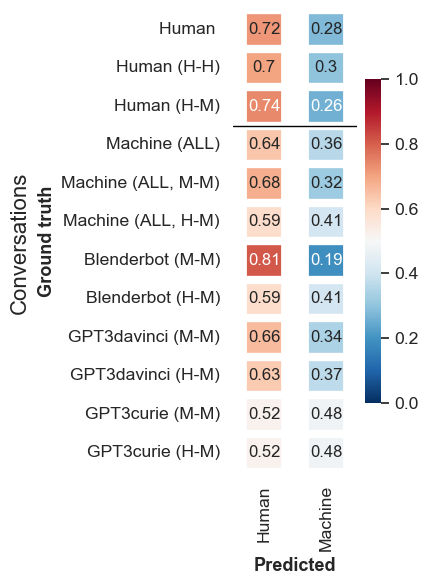

NameError: name 'top1' is not defined

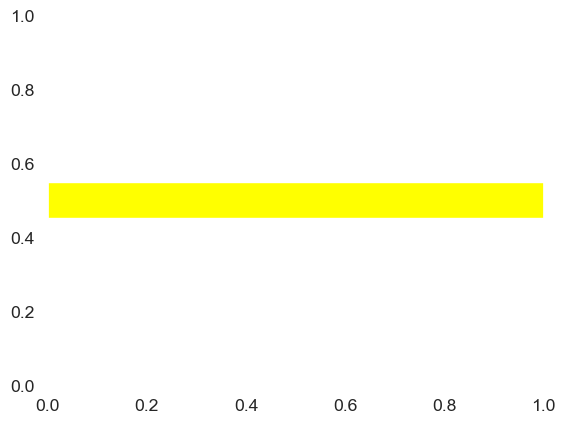

In [3]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols


key ='prolific' #choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots

print('loading results')
filename = TextFilePath + 'HclassH_all_nofeedback.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all_nofeedback.txt'
AI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHHclassH_all_nofeedback.txt'
H_inHH_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_all_nofeedback.txt'
AI_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHAIclassH_all_nofeedback.txt'
H_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_all_nofeedback.txt'
AI_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_all_nofeedback.txt'
AIb_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_all_nofeedback.txt'
AIb_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_all_nofeedback.txt'
AId_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_all_nofeedback.txt'
AId_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_all_nofeedback.txt'
AIc_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_all_nofeedback.txt'
AIc_inHAI_responses_all = np.loadtxt(filename)

print('results loaded')

# load std for top1 accuracy
print('loading results')
filename = TextFilePath + 'AIclassAI_top1std_all_nofeedback.txt'
AI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_top1std_all_nofeedback.txt'
AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_top1std_all_nofeedback.txt'
AI_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_top1std_nofeedback.txt'
AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_top1std_nofeedback.txt'
AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_top1std_nofeedback.txt'
AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_top1std_nofeedback.txt'
AId_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_top1std_nofeedback.txt'
AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_top1std_nofeedback.txt'
AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

top1std = [AI_responses_all_top1std,
AI_inAIAI_responses_all_top1std,
AI_inHAI_responses_all_top1std,
AIb_inAIAI_responses_all_top1std,
AIb_inHAI_responses_all_top1std,
AId_inAIAI_responses_all_top1std,
AId_inHAI_responses_all_top1std,
AIc_inAIAI_responses_all_top1std,
AIc_inHAI_responses_all_top1std]
print('results loaded')

modelist = ['Human ',
           'Human (H-H)',
           'Human (H-M)',
           'Machine (ALL)',
            'Machine (ALL, M-M)',
            'Machine (ALL, H-M)',
            'Blenderbot (M-M)',
            'Blenderbot (H-M)',
            'GPT3davinci (M-M)',
            'GPT3davinci (H-M)',
            'GPT3curie (M-M)',
            'GPT3curie (H-M)',
           ]

plotname = 'human_judge'

###################3compute confusion matrix
result_conf_mat = np.zeros((len(modelist),2),'float32')
result_conf_mat[0][0] = H_responses_all
result_conf_mat[0][1] = 1-H_responses_all
result_conf_mat[1][0] = H_inHH_responses_all
result_conf_mat[1][1] = 1-H_inHH_responses_all
result_conf_mat[2][0] = H_inHAI_responses_all
result_conf_mat[2][1] = 1-H_inHAI_responses_all
result_conf_mat[3][0] = 1-AI_responses_all
result_conf_mat[3][1] = AI_responses_all
result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
result_conf_mat[4][1] = AI_inAIAI_responses_all
result_conf_mat[5][0] = 1-AI_inHAI_responses_all
result_conf_mat[5][1] = AI_inHAI_responses_all
result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
result_conf_mat[6][1] = AIb_inAIAI_responses_all
result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
result_conf_mat[7][1] = AIb_inHAI_responses_all
result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
result_conf_mat[8][1] = AId_inAIAI_responses_all
result_conf_mat[9][0] = 1-AId_inHAI_responses_all
result_conf_mat[9][1] = AId_inHAI_responses_all
result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
result_conf_mat[10][1] = AIc_inAIAI_responses_all
result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
result_conf_mat[11][1] = AIc_inHAI_responses_all
result_conf_mat = np.around(result_conf_mat, decimals=2)

#print(result_conf_mat)

## parameters
fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
from matplotlib import font_manager as fm, rcParams
sn.set(font_scale=1.15)
rcParams['font.size'] = 12
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)

# Plot confusion matrix
df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                  columns=[i for i in ['Human', 'Machine']])
plt.figure(figsize=(2,6))

# Create a heatmap with centered annotations
# ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
#            vmin=0, vmax=1, cbar=False, annot_kws={'ha':'center'})
ax = sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=True, annot_kws={'ha':'center', 'fontproperties': prop_arial}, cbar_kws={"shrink":0.7})

for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=6)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=20)

_=ax.axhline(3, color='black', lw=1)  
#     print(help(_))
plt.xlabel("Predicted",weight='bold',fontproperties=prop_arialbold,fontsize=13)
_ = plt.ylabel("Ground Truth",weight='bold', fontproperties=prop_arialbold,fontsize=13)
plt.text(-3.6, 7.8, "Conversations",fontproperties=prop_arial,fontsize=16,rotation=90)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90,ha='center')

# # Add a black horizontal line after the third row
# _ = ax.axhline(3, color='black', lw=1.5)

plt.xlabel("Predicted")
plt.ylabel("Ground truth")

# Save and display
plt.tight_layout()
plt.savefig(folderpath + '_overall_confmat_nofeedback.eps', format='eps', bbox_inches='tight')
plt.savefig(folderpath + '_overall_confmat_nofeedback.png', bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# data (assuming you already have 'top1', 'top1std', 'modelist', 'result_conf_mat', etc.)
years = list(range(1, len(modelist)-2))
strtask = modelist[3:]

# Figure
fig, ax = plt.subplots()

# Make background white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add yellow rectangle
ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1, facecolor='yellow'))

# Barplot
ax.bar(
    strtask, top1, yerr=top1std,
    align='center', alpha=0.5, ecolor='black', capsize=10,
    color='black', width=0.3
)

# Force spines (axis lines) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Force tick labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Optional: Force plot title to black if you have one
# ax.title.set_color('black')


plt.ylabel('Top-1 Accuracy')
plt.xticks(rotation=90)
plt.ylim(0.3, 1)
plt.xlim(-0.5, 9)

# Draw chance line at 0.5
chancex = np.arange(len(years))
plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')

# Layout
fig.tight_layout()
fig.set_figwidth(3.5)
fig.set_figheight(5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save with white background
plt.savefig(folderpath + '_overall_barplot_nofeedback.png', bbox_inches='tight', facecolor='white')
plt.savefig(folderpath + '_overall_barplot_nofeedback.eps', format='eps', bbox_inches='tight', facecolor='white')

# Save with transparent background if needed
plt.savefig(folderpath + '_overall_barplot_nofeedback_transparent.png', bbox_inches='tight', transparent=True)

plt.show()

# For AI experts

In [ ]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols


key ='AIexperts' #choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots

print('loading results')
filename = TextFilePath + 'HclassH_all.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all.txt'
AI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHHclassH_all.txt'
H_inHH_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_all.txt'
AI_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHAIclassH_all.txt'
H_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_all.txt'
AI_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_all.txt'
AIb_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_all.txt'
AIb_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_all.txt'
AId_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_all.txt'
AId_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_all.txt'
AIc_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_all.txt'
AIc_inHAI_responses_all = np.loadtxt(filename)

print('results loaded')

# load std for top1 accuracy
print('loading results')
filename = TextFilePath + 'AIclassAI_top1std_all.txt'
AI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_top1std_all.txt'
AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_top1std_all.txt'
AI_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_top1std.txt'
AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_top1std.txt'
AId_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_top1std.txt'
AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

top1std = [AI_responses_all_top1std,
AI_inAIAI_responses_all_top1std,
AI_inHAI_responses_all_top1std,
AIb_inAIAI_responses_all_top1std,
AIb_inHAI_responses_all_top1std,
AId_inAIAI_responses_all_top1std,
AId_inHAI_responses_all_top1std,
AIc_inAIAI_responses_all_top1std,
AIc_inHAI_responses_all_top1std]
print('results loaded')

modelist = ['Human ',
           'Human (H-H)',
           'Human (H-M)',
           'Machine (ALL)',
            'Machine (ALL, M-M)',
            'Machine (ALL, H-M)',
            'Blenderbot (M-M)',
            'Blenderbot (H-M)',
            'GPT3davinci (M-M)',
            'GPT3davinci (H-M)',
            'GPT3curie (M-M)',
            'GPT3curie (H-M)',
           ]

plotname = 'human_judge'

###################3compute confusion matrix
result_conf_mat = np.zeros((len(modelist),2),'float32')
result_conf_mat[0][0] = H_responses_all
result_conf_mat[0][1] = 1-H_responses_all
result_conf_mat[1][0] = H_inHH_responses_all
result_conf_mat[1][1] = 1-H_inHH_responses_all
result_conf_mat[2][0] = H_inHAI_responses_all
result_conf_mat[2][1] = 1-H_inHAI_responses_all
result_conf_mat[3][0] = 1-AI_responses_all
result_conf_mat[3][1] = AI_responses_all
result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
result_conf_mat[4][1] = AI_inAIAI_responses_all
result_conf_mat[5][0] = 1-AI_inHAI_responses_all
result_conf_mat[5][1] = AI_inHAI_responses_all
result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
result_conf_mat[6][1] = AIb_inAIAI_responses_all
result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
result_conf_mat[7][1] = AIb_inHAI_responses_all
result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
result_conf_mat[8][1] = AId_inAIAI_responses_all
result_conf_mat[9][0] = 1-AId_inHAI_responses_all
result_conf_mat[9][1] = AId_inHAI_responses_all
result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
result_conf_mat[10][1] = AIc_inAIAI_responses_all
result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
result_conf_mat[11][1] = AIc_inHAI_responses_all
result_conf_mat = np.around(result_conf_mat, decimals=2)

#print(result_conf_mat)

## parameters
fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
from matplotlib import font_manager as fm, rcParams
sn.set(font_scale=1.15)
rcParams['font.size'] = 12
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)

# Plot confusion matrix
df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                  columns=[i for i in ['Human', 'Machine']])
plt.figure(figsize=(2,6))

# Create a heatmap with centered annotations
# ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
#            vmin=0, vmax=1, cbar=False, annot_kws={'ha':'center'})
ax = sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=True, annot_kws={'ha':'center', 'fontproperties': prop_arial}, cbar_kws={"shrink":0.7})

for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=6)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=20)

_=ax.axhline(3, color='black', lw=1)  
#     print(help(_))
plt.xlabel("Predicted",weight='bold',fontproperties=prop_arialbold,fontsize=13)
_ = plt.ylabel("Ground Truth",weight='bold', fontproperties=prop_arialbold,fontsize=13)
plt.text(-3.6, 7.8, "Conversations",fontproperties=prop_arial,fontsize=16,rotation=90)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90,ha='center')

# # Add a black horizontal line after the third row
# _ = ax.axhline(3, color='black', lw=1.5)

plt.xlabel("Predicted")
plt.ylabel("Ground truth")

# Save and display
plt.tight_layout()
plt.savefig(folderpath + '_overall_confmat.eps', format='eps', bbox_inches='tight')
plt.savefig(folderpath + '_overall_confmat.png', bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# data (assuming you already have 'top1', 'top1std', 'modelist', 'result_conf_mat', etc.)
years = list(range(1, len(modelist)-2))
strtask = modelist[3:]

#compute top 1 accuracy for each AI model and also overall AI
top1 = []
#print(result_conf_mat)
for i in range(2,len(modelist)-1):
    #print(i)
    top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
print(top1)

# Figure
fig, ax = plt.subplots()

# Make background white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add yellow rectangle
#ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1, facecolor='yellow'))

# Barplot
ax.bar(
    strtask, top1, yerr=top1std,
    align='center', alpha=0.5, ecolor='black', capsize=0,
    color='black', width=0.3
)

# Force spines (axis lines) to black
for spine in ax.spines.values():
    spine.set_color('black')

# Force tick labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Optional: Force plot title to black if you have one
# ax.title.set_color('black')


plt.ylabel('Imitation detectability')
plt.xticks(rotation=90)
plt.ylim(0.3, 1)
plt.xlim(-0.5, 9)

# Draw chance line at 0.5
chancex = np.arange(len(years))
plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')

# Layout
fig.tight_layout()
fig.set_figwidth(3.5)
fig.set_figheight(5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save with white background
plt.savefig(folderpath + '_overall_barplot.png', bbox_inches='tight', facecolor='white')
plt.savefig(folderpath + '_overall_barplot.eps', format='eps', bbox_inches='tight', facecolor='white')

# Save with transparent background if needed
#plt.savefig(folderpath + '_overall_barplot_transparent.png', bbox_inches='tight', transparent=True)

plt.show()


In [ ]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols


key ='mturk' #choose from these choices: inlab, mturk, prolific
TextFilePath = './savedResults_elisa/Task3_' + key + '_'
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots

print('loading results')
filename = TextFilePath + 'HclassH_all.txt'
H_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIclassAI_all.txt'
AI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHHclassH_all.txt'
H_inHH_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_all.txt'
AI_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'HinHAIclassH_all.txt'
H_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_all.txt'
AI_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_all.txt'
AIb_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_all.txt'
AIb_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_all.txt'
AId_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_all.txt'
AId_inHAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_all.txt'
AIc_inAIAI_responses_all = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_all.txt'
AIc_inHAI_responses_all = np.loadtxt(filename)

print('results loaded')

# load std for top1 accuracy
print('loading results')
filename = TextFilePath + 'AIclassAI_top1std_all.txt'
AI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinAIAIclassAI_top1std_all.txt'
AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIinHAIclassAI_top1std_all.txt'
AI_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIbinHAIclassAI_top1std.txt'
AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIdinHAIclassAI_top1std.txt'
AId_inHAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

filename = TextFilePath + 'AIcinHAIclassAI_top1std.txt'
AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

top1std = [AI_responses_all_top1std,
AI_inAIAI_responses_all_top1std,
AI_inHAI_responses_all_top1std,
AIb_inAIAI_responses_all_top1std,
AIb_inHAI_responses_all_top1std,
AId_inAIAI_responses_all_top1std,
AId_inHAI_responses_all_top1std,
AIc_inAIAI_responses_all_top1std,
AIc_inHAI_responses_all_top1std]
print('results loaded')

modelist = ['Human ',
           'Human (H-H)',
           'Human (H-M)',
           'Machine (ALL)',
            'Machine (ALL, M-M)',
            'Machine (ALL, H-M)',
            'Blenderbot (M-M)',
            'Blenderbot (H-M)',
            'GPT3davinci (M-M)',
            'GPT3davinci (H-M)',
            'GPT3curie (M-M)',
            'GPT3curie (H-M)',
           ]

plotname = 'human_judge'

###################3compute confusion matrix
result_conf_mat = np.zeros((len(modelist),2),'float32')
result_conf_mat[0][0] = H_responses_all
result_conf_mat[0][1] = 1-H_responses_all
result_conf_mat[1][0] = H_inHH_responses_all
result_conf_mat[1][1] = 1-H_inHH_responses_all
result_conf_mat[2][0] = H_inHAI_responses_all
result_conf_mat[2][1] = 1-H_inHAI_responses_all
result_conf_mat[3][0] = 1-AI_responses_all
result_conf_mat[3][1] = AI_responses_all
result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
result_conf_mat[4][1] = AI_inAIAI_responses_all
result_conf_mat[5][0] = 1-AI_inHAI_responses_all
result_conf_mat[5][1] = AI_inHAI_responses_all
result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
result_conf_mat[6][1] = AIb_inAIAI_responses_all
result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
result_conf_mat[7][1] = AIb_inHAI_responses_all
result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
result_conf_mat[8][1] = AId_inAIAI_responses_all
result_conf_mat[9][0] = 1-AId_inHAI_responses_all
result_conf_mat[9][1] = AId_inHAI_responses_all
result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
result_conf_mat[10][1] = AIc_inAIAI_responses_all
result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
result_conf_mat[11][1] = AIc_inHAI_responses_all
result_conf_mat = np.around(result_conf_mat, decimals=2)

## parameters
fpath_arial = "/System/Library/Fonts/Supplemental/Arial.ttf"
fpath_arialbold = "/System/Library/Fonts/Supplemental/Arial Bold.ttf"
from matplotlib import font_manager as fm, rcParams
sn.set(font_scale=1.15)
rcParams['font.size'] = 12
prop_arial = fm.FontProperties(fname=fpath_arial)
prop_arialbold = fm.FontProperties(fname=fpath_arialbold)

# Plot confusion matrix
df_cm = pd.DataFrame(result_conf_mat, index=[i for i in modelist],
                  columns=[i for i in ['Human', 'Machine']])
plt.figure(figsize=(2,6))

# Create a heatmap with centered annotations
# ax = sn.heatmap(df_cm, annot=True, robust=True, cmap='RdBu_r', 
#            vmin=0, vmax=1, cbar=False, annot_kws={'ha':'center'})
ax = sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=True, annot_kws={'ha':'center', 'fontproperties': prop_arial}, cbar_kws={"shrink":0.7})




for i in range(df_cm.shape[0] + 1):
    ax.axhline(i, color='white', lw=6)
for i in range(df_cm.shape[1] + 1):
    ax.axvline(i, color='white', lw=20)

_=ax.axhline(3, color='black', lw=1)  
#     print(help(_))
plt.xlabel("Predicted",weight='bold',fontproperties=prop_arialbold,fontsize=13)
_ = plt.ylabel("Ground Truth",weight='bold', fontproperties=prop_arialbold,fontsize=13)
plt.text(-3.6, 7.8, "Conversations",fontproperties=prop_arial,fontsize=16,rotation=90)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90,ha='center')

# # Add a black horizontal line after the third row
# _ = ax.axhline(3, color='black', lw=1.5)

plt.xlabel("Predicted")
plt.ylabel("Ground truth")

# Save and display
plt.tight_layout()
plt.savefig(folderpath + '_overall_confmat.eps', format='eps', bbox_inches='tight')
plt.savefig(folderpath + '_overall_confmat.png', bbox_inches='tight')
plt.show()

In [ ]:
def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ConvertDictToDataFrame(datadict):
    #data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}    
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
        
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def ComputeStats_group1(d_cond):
    #compare against chance
    r_data = np.random.choice([0, 1], size=len(d_cond), p=[.5, .5])
    result = pg.ttest(d_cond, r_data, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof

def ComputeStats_group2(data_d1, data_d2):
    result = pg.ttest(data_d1, data_d2, correction=True) 

    # reporting format in Turing project (p < 10−15, two-tailed t-test, t = 8.5, df = 478)
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof
    
def ComputeStats_group3(data_dict):
    df = ConvertDictToDataFrame(data_dict)
    #print(df)
    mod = ols('X ~ group', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    #A one-way ANOVA revealed that there [was or was not] a statistically significant difference in [dependent variable] 
    #between at least two groups (F(between groups df, within groups df) = [F-value], p = [p-value]).
    BetweenGP_df = aov_table.df.group
    WithinGP_df = aov_table.df.Residual
    Fval = aov_table.F.group
    pval = aov_table['PR(>F)'].group
    icon = outputIconForStats(pval)
    return icon, BetweenGP_df, WithinGP_df, Fval, pval

def displayStats_group12(pval, Tval, dof):    
    if pval < 0.05:
        print('There is difference between data1 and data2.')
        if pval > 0.01 and pval < 0.05:
            print("(p < 0.05, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        elif pval > 0.001 and pval <= 0.01:
            print("(p < 0.01, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        elif pval > 0.0001 and pval <= 0.001:
            print("(p < 0.001, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        else:
            print("(p < 0.0001, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
    else:
        print('There is NO difference between data1 and data2.')
        print("(p > 0.05, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")

        
def displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval):    
    print("F(" + str(BetweenGP_df) + ", " + str(WithinGP_df) + ") = " + str(Fval) +", p-val=" + str(pval))

def ConcatData(data1, data2):
    import random
    import math
    
    #print(data1)
    #print(data2)
    if len(data1) < len(data2):        
        BootstrapTimes = len(data1)
    else:        
        BootstrapTimes = len(data2)
    
    #print(BootstrapTimes)
    y1 = random.sample(data1, BootstrapTimes)
    #print(y1)
    y2 = random.sample(data2, BootstrapTimes)
    #print(y2)
    y_comb = y1+y2
    y_comb = np.array(y_comb)        
    return y_comb

def getStats(condition_chosen_list, TextFilePath):
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    

    Pdata = {} #data stored for computing statistics 
    #initialize PData
    for i in range(2,len(modelist)-1):
        Pdata[modelist[i+1]] = {}
    #print(Pdata)

    for condition_chosen in condition_chosen_list:

        filename = TextFilePath + 'HclassH_demo'+condition_chosen+'_acc_per_image.txt'
        data1tot = np.loadtxt(filename).tolist()

        filename = TextFilePath + 'AIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[3]][condition_chosen] = datatot

        filename = TextFilePath + 'AIinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[4]][condition_chosen] = datatot

        filename = TextFilePath + 'AIinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[5]][condition_chosen] = datatot

        filename = TextFilePath + 'AIbinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[6]][condition_chosen] = datatot

        filename = TextFilePath + 'AIbinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[7]][condition_chosen] = datatot

        filename = TextFilePath + 'AIdinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[8]][condition_chosen] = datatot

        filename = TextFilePath + 'AIdinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[9]][condition_chosen] = datatot

        filename = TextFilePath + 'AIcinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[10]][condition_chosen] = datatot

        filename = TextFilePath + 'AIcinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[11]][condition_chosen] = datatot


    chancePval = []
    groupPval = []
    for i in range(2,len(modelist)-1):
        for condition_chosen in condition_chosen_list:        
            #compute against chance 50%
            d_cond = Pdata[modelist[i+1]][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chancePval.append(icon)
        if len(Pdata[modelist[i+1]].keys()) == 2:
            data_d1 = Pdata[modelist[i+1]][condition_chosen_list[0]]
            data_d2 = Pdata[modelist[i+1]][condition_chosen_list[1]]
            icon, pval, Tval, dof =  ComputeStats_group2(data_d1, data_d2)
            groupPval.append(icon)
        elif len(Pdata[modelist[i+1]].keys()) >= 3: 
            icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(Pdata[modelist[i+1]])
            groupPval.append(icon)
        else:
            print("Oops!  This should NOT happen...")

#     print(chancePval)
#     print(groupPval)

    return chancePval, groupPval

def getStats_expvenues(condition_chosen_list, TextFilePathHead):
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]

    Pdata = {} #data stored for computing statistics 
    #initialize PData
    for i in range(2,len(modelist)-1):
        Pdata[modelist[i+1]] = {}
    #print(Pdata)

    for condition_chosen in condition_chosen_list:

        TextFilePath = TextFilePathHead + condition_chosen + '_' 
        
        filename = TextFilePath + 'HclassH_acc_per_image.txt'
        data1tot = np.loadtxt(filename).tolist()

        filename = TextFilePath + 'AIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[3]][condition_chosen] = datatot

        filename = TextFilePath + 'AIinAIAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[4]][condition_chosen] = datatot

        filename = TextFilePath + 'AIinHAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[5]][condition_chosen] = datatot

        filename = TextFilePath + 'AIbinAIAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[6]][condition_chosen] = datatot

        filename = TextFilePath + 'AIbinHAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[7]][condition_chosen] = datatot

        filename = TextFilePath + 'AIdinAIAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[8]][condition_chosen] = datatot

        filename = TextFilePath + 'AIdinHAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[9]][condition_chosen] = datatot

        filename = TextFilePath + 'AIcinAIAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[10]][condition_chosen] = datatot

        filename = TextFilePath + 'AIcinHAIclassAI_acc_per_image.txt'
        data2tot = np.loadtxt(filename).tolist()
        datatot = ConcatData(data1tot, data2tot)
        Pdata[modelist[11]][condition_chosen] = datatot


    chancePval = []
    groupPval = []
    for i in range(2,len(modelist)-1):
        for condition_chosen in condition_chosen_list:        
            #compute against chance 50%
            d_cond = Pdata[modelist[i+1]][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chancePval.append(icon)
        if len(Pdata[modelist[i+1]].keys()) == 2:
            data_d1 = Pdata[modelist[i+1]][condition_chosen_list[0]]
            data_d2 = Pdata[modelist[i+1]][condition_chosen_list[1]]
            icon, pval, Tval, dof =  ComputeStats_group2(data_d1, data_d2)
            groupPval.append(icon)
        elif len(Pdata[modelist[i+1]].keys()) >= 3: 
            icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(Pdata[modelist[i+1]])
            groupPval.append(icon)
        else:
            print("Oops!  This should NOT happen...")

#     print(chancePval)
#     print(groupPval)

    return chancePval, groupPval

In [ ]:
def plot_res_demographics(condition_chosen, TextFilePath):
    import numpy as np
    import json
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    print('loading results for condition', condition_chosen)
    filename = TextFilePath + 'HclassH_demo'+condition_chosen+'.txt'
    H_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIclassAI_demo'+condition_chosen+'.txt'
    AI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'HinHHclassH_demo'+condition_chosen+'.txt'
    H_inHH_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIinAIAIclassAI_demo'+condition_chosen+'.txt'
    AI_inAIAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'HinHAIclassH_demo'+condition_chosen+'.txt'
    H_inHAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIinHAIclassAI_demo'+condition_chosen+'.txt'
    AI_inHAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIbinAIAIclassAI_demo'+condition_chosen+'.txt'
    AIb_inAIAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIbinHAIclassAI_demo'+condition_chosen+'.txt'
    AIb_inHAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIdinAIAIclassAI_demo'+condition_chosen+'.txt'
    AId_inAIAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIdinHAIclassAI_demo'+condition_chosen+'.txt'
    AId_inHAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIcinAIAIclassAI_demo'+condition_chosen+'.txt'
    AIc_inAIAI_responses_all = np.loadtxt(filename)

    filename = TextFilePath + 'AIcinHAIclassAI_demo'+condition_chosen+'.txt'
    AIc_inHAI_responses_all = np.loadtxt(filename)
    
    filename = TextFilePath + 'AIclassAI_top1std_demo'+condition_chosen+'.txt'
    AI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AI_inHAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIbinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIbinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIdinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIdinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AId_inHAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIcinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

    filename = TextFilePath + 'AIcinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

    top1std = [AI_responses_all_top1std,
    AI_inAIAI_responses_all_top1std,
    AI_inHAI_responses_all_top1std,
    AIb_inAIAI_responses_all_top1std,
    AIb_inHAI_responses_all_top1std,
    AId_inAIAI_responses_all_top1std,
    AId_inHAI_responses_all_top1std,
    AIc_inAIAI_responses_all_top1std,
    AIc_inHAI_responses_all_top1std]

    print('results loaded')
        
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]

    #compute confusion matrix
    result_conf_mat = np.zeros((len(modelist),2),'float32')
    result_conf_mat[0][0] = H_responses_all
    result_conf_mat[0][1] = 1-H_responses_all
    result_conf_mat[1][0] = H_inHH_responses_all
    result_conf_mat[1][1] = 1-H_inHH_responses_all
    result_conf_mat[2][0] = H_inHAI_responses_all
    result_conf_mat[2][1] = 1-H_inHAI_responses_all
    result_conf_mat[3][0] = 1-AI_responses_all
    result_conf_mat[3][1] = AI_responses_all
    result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
    result_conf_mat[4][1] = AI_inAIAI_responses_all
    result_conf_mat[5][0] = 1-AI_inHAI_responses_all
    result_conf_mat[5][1] = AI_inHAI_responses_all
    result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
    result_conf_mat[6][1] = AIb_inAIAI_responses_all
    result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
    result_conf_mat[7][1] = AIb_inHAI_responses_all
    result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
    result_conf_mat[8][1] = AId_inAIAI_responses_all
    result_conf_mat[9][0] = 1-AId_inHAI_responses_all
    result_conf_mat[9][1] = AId_inHAI_responses_all
    result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
    result_conf_mat[10][1] = AIc_inAIAI_responses_all
    result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
    result_conf_mat[11][1] = AIc_inHAI_responses_all
    result_conf_mat = np.around(result_conf_mat, decimals=2)

    print(result_conf_mat)
    
    df_cm = pd.DataFrame(result_conf_mat, index = [i for i in modelist],
                  columns = [i for i in ['Human','Machine']])
    plt.figure(figsize = (1.2,5.5))
    sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1)

    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    
    plotname = 'human_judge'+condition_chosen
    plt.savefig(folderpath + plotname + '_overall_confmat.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + plotname + '_overall_confmat.png', bbox_inches='tight')
#     plt.savefig('../' + plotname + '_confmat.png', bbox_inches='tight')
#     plt.savefig('Human_judge_confmatGiorgia'+condition_chosen+'.pdf', bbox_inches='tight')
#     plt.savefig('Human_judge_confmatGiorgia'+condition_chosen+'.png', bbox_inches='tight')
    plt.show()
    
    #compute top 1 accuracy for each AI model and also overall AI
    top1 = []
    #print(result_conf_mat)
    for i in range(2,len(modelist)-1):
        #print(i)
        top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
    print(condition_chosen, top1)
   
    import matplotlib.pyplot as plt
    import numpy as np

    #data
    #x-axis
    years = list(range(1, len(modelist)-2))
    strtask = modelist[3:]
    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots()

    ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1,facecolor='yellow'))
    #bar chart properties
    #ax.bar(strtask, top1, color ='black', width = 0.3)
    ax.bar(strtask, top1, yerr=top1std,
       align='center', alpha=0.5, ecolor='black', capsize=10,
       color ='black', width = 0.3)

    plt.ylabel('Top-1 Accuracy')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

    plt.ylim(0.3, 1)
    #plt.xlim(0.5, len(years)+0.5)

    #draw chance 0.5 
    chancex =np.arange(len(years))
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(3.5)
    fig.set_figheight(5)

    #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(folderpath + plotname + '_overall_barplot.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + plotname + '_overall_barplot.png', bbox_inches='tight')
    plt.show()
#     fig.savefig('../' + plotname + '.png', bbox_inches='tight')
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.pdf', bbox_inches='tight')
    
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.png', bbox_inches='tight')

In [ ]:
if key == 'inlab':
    condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
else:
    condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS']
    
#condition_list = ['live','sandbox']
# for condition in condition_list:
#     plot_res_demographics(condition, TextFilePath)

In [ ]:
### plots for grouping demographic information
def plot_res_demographics(condition_chosen_list, TextFilePath, plotname,facebarcolor):
    import numpy as np
    import json
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    
    compiledAllConds = {}
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    
    for condition_chosen in condition_chosen_list:
                
        print('loading results for condition', condition_chosen)
        filename = TextFilePath + 'HclassH_demo'+condition_chosen+'.txt'
        H_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI_demo'+condition_chosen+'.txt'
        AI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'HinHHclassH_demo'+condition_chosen+'.txt'
        H_inHH_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_demo'+condition_chosen+'.txt'
        AI_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'HinHAIclassH_demo'+condition_chosen+'.txt'
        H_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_demo'+condition_chosen+'.txt'
        AI_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI_demo'+condition_chosen+'.txt'
        AIb_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI_demo'+condition_chosen+'.txt'
        AIb_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI_demo'+condition_chosen+'.txt'
        AId_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI_demo'+condition_chosen+'.txt'
        AId_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI_demo'+condition_chosen+'.txt'
        AIc_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI_demo'+condition_chosen+'.txt'
        AIc_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI_top1std_demo'+condition_chosen+'.txt'
        AI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AI_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AId_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
        AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

        top1std = [AI_responses_all_top1std,
        AI_inAIAI_responses_all_top1std,
        AI_inHAI_responses_all_top1std,
        AIb_inAIAI_responses_all_top1std,
        AIb_inHAI_responses_all_top1std,
        AId_inAIAI_responses_all_top1std,
        AId_inHAI_responses_all_top1std,
        AIc_inAIAI_responses_all_top1std,
        AIc_inHAI_responses_all_top1std]

        print('results loaded')        

        #compute confusion matrix
        result_conf_mat = np.zeros((len(modelist),2),'float32')
        result_conf_mat[0][0] = H_responses_all
        result_conf_mat[0][1] = 1-H_responses_all
        result_conf_mat[1][0] = H_inHH_responses_all
        result_conf_mat[1][1] = 1-H_inHH_responses_all
        result_conf_mat[2][0] = H_inHAI_responses_all
        result_conf_mat[2][1] = 1-H_inHAI_responses_all
        result_conf_mat[3][0] = 1-AI_responses_all
        result_conf_mat[3][1] = AI_responses_all
        result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
        result_conf_mat[4][1] = AI_inAIAI_responses_all
        result_conf_mat[5][0] = 1-AI_inHAI_responses_all
        result_conf_mat[5][1] = AI_inHAI_responses_all
        result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
        result_conf_mat[6][1] = AIb_inAIAI_responses_all
        result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
        result_conf_mat[7][1] = AIb_inHAI_responses_all
        result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
        result_conf_mat[8][1] = AId_inAIAI_responses_all
        result_conf_mat[9][0] = 1-AId_inHAI_responses_all
        result_conf_mat[9][1] = AId_inHAI_responses_all
        result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
        result_conf_mat[10][1] = AIc_inAIAI_responses_all
        result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
        result_conf_mat[11][1] = AIc_inHAI_responses_all
        result_conf_mat = np.around(result_conf_mat, decimals=2)

        #print(result_conf_mat)

        top1 = []
        for i in range(2,len(modelist)-1):
            #print(i)
            top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
        #print(condition_chosen, top1)

        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen +'_std'] = top1std
    
    
    ### we have the compiled resutls now; lets plot them
    import matplotlib.pyplot as plt
    import numpy as np

    #data
    #x-axis
    years = list(range(1, len(modelist)-2))
    strtask = modelist[3:]
    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(strtask))  # the label locations
    point_x = [] #for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5 #len(condition_chosen_list)
    else:
        multiplier = -1 #len(condition_chosen_list)
    #ngroups = len(condition_chosen_list)

    ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1,facecolor='yellow'))
    #bar chart properties
    #ax.bar(strtask, top1, color ='black', width = 0.3)    

    for ind, condition_chosen in enumerate(condition_chosen_list):
    #for condition_chosen in condition_chosen_list:
    #for attribute, measurement in compiledAllConds.items():
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        attribute = condition_chosen
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr= measurement_std, width = width,alpha=0.5,
                       label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')#,
                       #align='center', alpha=0.5, ecolor='black', capsize=10,color ='black')
        #ax.bar_label(rects, padding=3)
        point_x.extend( (x+offset).tolist() )
        multiplier += 1
    
    ########## ready for plotting stats
    #print(point_x)
    ###### getting statistics
    chancePval, groupPval = getStats(condition_chosen_list, TextFilePath)
    point_x.sort(reverse=False)
    #print(point_x)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, transform=ax.get_xaxis_transform())
        
           
#     ax.bar(strtask, top1, yerr=top1std,
#        align='center', alpha=0.5, ecolor='black', capsize=10,
#        color ='black', width = 0.3)

    ax.set_xticks(x, strtask)
    ax.legend(loc='upper left', ncols=len(condition_chosen_list))

    ###### plot stats for each group of bars
    totalPx = len(point_x)
#     print(totalPx)
#     print(point_x)
    count = 0
    for s1 in range(0,totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0,len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x/len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(   np.array([starting_x, ending_x]),
                           np.arange(2)*0+0.82, 'k', label='chance (50%)')
        ax.text(center_x, .8, groupPval[count], fontsize=8, transform=ax.get_xaxis_transform())
        count = count + 1
    
    ###### ending: plot stats for each group of bars
    
    plt.ylabel('Top-1 Accuracy')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

    plt.ylim(0.25, 1)
    #plt.xlim(0.5, len(years)+0.5)   

    #draw chance 0.5 
    chancex =np.arange(len(years)+1)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(7)
    fig.set_figheight(5)

    #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png',  bbox_inches='tight')
    plt.show()
#     fig.savefig('../' + plotname + '.png', bbox_inches='tight')
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.pdf', bbox_inches='tight')
    
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.png', bbox_inches='tight')


#======================AGE=======
key = 'inlab'
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
condition_chosen_list = ['ageL35','ageG35L45']
TextFilePath = './savedResults/Task3_' + key + '_'
plotpathname = './plots/Task3_' + key + '_demor_AgeBarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor)


#================================= Gender
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
condition_chosen_list = ['F','M']
TextFilePath = './savedResults/Task3_' + key + '_'
plotpathname = './plots/Task3_' + key + '_demor_GenderBarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor)

#================================= Education
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
condition_chosen_list = ['school','bachelor','postgrad']
TextFilePath = './savedResults/Task3_' + key + '_'
plotpathname = './plots/Task3_' + key + '_demor_EducationBarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor)

#================================= W/WO Gender Questions==============
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
condition_chosen_list = ['wGenderQ','woGenderQ']
TextFilePath = './savedResults/Task3_' + key + '_'
plotpathname = './plots/Task3_' + key + '_demor_WOgenderQuesBarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor)

In [ ]:
### plots for grouping various keys (inlab mturk prolific)

### plots for grouping demographic information
def plot_res_demographics(condition_chosen_list, plotname,facebarcolor):
    import numpy as np
    import json
    import seaborn as sn
    import pandas as pd
    import matplotlib.pyplot as plt
    
    compiledAllConds = {}
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    
    for condition_chosen in condition_chosen_list:
                
        TextFilePath = './savedResults/Task3_' + condition_chosen + '_'
            
        print('loading results for condition', condition_chosen)
        filename = TextFilePath + 'HclassH.txt'
        H_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI.txt'
        AI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'HinHHclassH.txt'
        H_inHH_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI.txt'
        AI_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'HinHAIclassH.txt'
        H_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI.txt'
        AI_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI.txt'
        AIb_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI.txt'
        AIb_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI.txt'
        AId_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI.txt'
        AId_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI.txt'
        AIc_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI.txt'
        AIc_inHAI_responses_all = np.loadtxt(filename)

        print('results loaded')

        # load std for top1 accuracy
        print('loading results')
        filename = TextFilePath + 'AIclassAI_top1std.txt'
        AI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_top1std.txt'
        AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_top1std.txt'
        AI_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
        AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI_top1std.txt'
        AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
        AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI_top1std.txt'
        AId_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
        AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI_top1std.txt'
        AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

        top1std = [AI_responses_all_top1std,
        AI_inAIAI_responses_all_top1std,
        AI_inHAI_responses_all_top1std,
        AIb_inAIAI_responses_all_top1std,
        AIb_inHAI_responses_all_top1std,
        AId_inAIAI_responses_all_top1std,
        AId_inHAI_responses_all_top1std,
        AIc_inAIAI_responses_all_top1std,
        AIc_inHAI_responses_all_top1std]

        print('results loaded')        

        #compute confusion matrix
        result_conf_mat = np.zeros((len(modelist),2),'float32')
        result_conf_mat[0][0] = H_responses_all
        result_conf_mat[0][1] = 1-H_responses_all
        result_conf_mat[1][0] = H_inHH_responses_all
        result_conf_mat[1][1] = 1-H_inHH_responses_all
        result_conf_mat[2][0] = H_inHAI_responses_all
        result_conf_mat[2][1] = 1-H_inHAI_responses_all
        result_conf_mat[3][0] = 1-AI_responses_all
        result_conf_mat[3][1] = AI_responses_all
        result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
        result_conf_mat[4][1] = AI_inAIAI_responses_all
        result_conf_mat[5][0] = 1-AI_inHAI_responses_all
        result_conf_mat[5][1] = AI_inHAI_responses_all
        result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
        result_conf_mat[6][1] = AIb_inAIAI_responses_all
        result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
        result_conf_mat[7][1] = AIb_inHAI_responses_all
        result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
        result_conf_mat[8][1] = AId_inAIAI_responses_all
        result_conf_mat[9][0] = 1-AId_inHAI_responses_all
        result_conf_mat[9][1] = AId_inHAI_responses_all
        result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
        result_conf_mat[10][1] = AIc_inAIAI_responses_all
        result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
        result_conf_mat[11][1] = AIc_inHAI_responses_all
        result_conf_mat = np.around(result_conf_mat, decimals=2)

        #print(result_conf_mat)

        top1 = []
        for i in range(2,len(modelist)-1):
            #print(i)
            top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
        #print(condition_chosen, top1)

        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen +'_std'] = top1std
    
    ### we have the compiled resutls now; lets plot them
    import matplotlib.pyplot as plt
    import numpy as np

    #data
    #x-axis
    years = list(range(1, len(modelist)-2))
    strtask = modelist[3:]
    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots()
    x = np.arange(len(strtask))  # the label locations
    point_x = [] #for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5 #len(condition_chosen_list)
    else:
        multiplier = -1 #len(condition_chosen_list)
    #ngroups = len(condition_chosen_list)

    ax.add_patch(Rectangle((-0.5, 0.45), 9, 0.1,facecolor='yellow'))
    #bar chart properties
    #ax.bar(strtask, top1, color ='black', width = 0.3)    

    for ind, condition_chosen in enumerate(condition_chosen_list):
    #for condition_chosen in condition_chosen_list:
    #for attribute, measurement in compiledAllConds.items():
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        attribute = condition_chosen
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr= measurement_std, width = width,alpha=0.5,
                       label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')#,
                       #align='center', alpha=0.5, ecolor='black', capsize=10,color ='black')
        #ax.bar_label(rects, padding=3)
        point_x.extend( (x+offset).tolist() )
        multiplier += 1
    
#     ax.bar(strtask, top1, yerr=top1std,
#        align='center', alpha=0.5, ecolor='black', capsize=10,
#        color ='black', width = 0.3)


    ########## ready for plotting stats
    #print(point_x)
    ###### getting statistics
    TextFilePath = './savedResults/Task3_'
    chancePval, groupPval = getStats_expvenues(condition_chosen_list, TextFilePath)
    point_x.sort(reverse=False)
    #print(point_x)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, transform=ax.get_xaxis_transform())

    ax.set_xticks(x, strtask)
    ax.legend(loc='upper left', ncols=len(condition_chosen_list))

    ###### plot stats for each group of bars
    totalPx = len(point_x)
#     print(totalPx)
#     print(point_x)
    count = 0
    for s1 in range(0,totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0,len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x/len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(   np.array([starting_x, ending_x]),
                           np.arange(2)*0+0.82, 'k', label='chance (50%)')
        ax.text(center_x, .8, groupPval[count], fontsize=8, transform=ax.get_xaxis_transform())
        count = count + 1
    
    ###### ending: plot stats for each group of bars
    
    plt.ylabel('Top-1 Accuracy')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

    plt.ylim(0.25, 1)
    #plt.xlim(0.5, len(years)+0.5)

    #draw chance 0.5 
    chancex =np.arange(len(years)+1)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(7)
    fig.set_figheight(5)

    #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')
    plt.show()
#     fig.savefig('../' + plotname + '.png', bbox_inches='tight')
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.pdf', bbox_inches='tight')
    
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.png', bbox_inches='tight')


#======================AGE=======

#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
condition_chosen_list = ['inlab','prolific','mturk']
plotpathname = './plots/Task3_' + key + '_QualityVenueBarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, plotpathname,facebarcolor)


In [ ]:
pip install --upgrade statsmodels

In [16]:
def plot_res_demographics(condition_chosen_list, TextFilePath, plotname, facebarcolor, bonferroni):

    plt.style.use('default')
    
    compiledAllConds = {}
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    
    # Store data for computing statistics
    Pdata = {}  
    for i in range(3, len(modelist)):  # Starting from 'Machine (all)'
        Pdata[modelist[i]] = {}
    
    for condition_chosen in condition_chosen_list:
        print('loading results for condition', condition_chosen)
        
        # Load all the necessary files as in the original second code
        filename = TextFilePath + 'HclassH_all_'+condition_chosen+'.txt'
        H_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIclassAI_all_'+condition_chosen+'.txt'
        AI_responses_all = np.loadtxt(filename)
        
        # Continue with all other file loading as in the original second code
        filename = TextFilePath + 'HinHHclassH_all_'+condition_chosen+'.txt'
        H_inHH_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_all_'+condition_chosen+'.txt'
        AI_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'HinHAIclassH_all_'+condition_chosen+'.txt'
        H_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_all_'+condition_chosen+'.txt'
        AI_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI_all_'+condition_chosen+'.txt'
        AIb_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI_all_'+condition_chosen+'.txt'
        AIb_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI_all_'+condition_chosen+'.txt'
        AId_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI_all_'+condition_chosen+'.txt'
        AId_inHAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI_all_'+condition_chosen+'.txt'
        AIc_inAIAI_responses_all = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI_all_'+condition_chosen+'.txt'
        AIc_inHAI_responses_all = np.loadtxt(filename)

        # Load standard deviation data
        filename = TextFilePath + 'AIclassAI_top1std_all_'+condition_chosen+'.txt'
        AI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinAIAIclassAI_top1std_all_'+condition_chosen+'.txt'
        AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIinHAIclassAI_top1std_all_'+condition_chosen+'.txt'
        AI_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinAIAIclassAI_top1std_'+condition_chosen+'.txt'
        AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIbinHAIclassAI_top1std_'+condition_chosen+'.txt'
        AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinAIAIclassAI_top1std_'+condition_chosen+'.txt'
        AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIdinHAIclassAI_top1std_'+condition_chosen+'.txt'
        AId_inHAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinAIAIclassAI_top1std_'+condition_chosen+'.txt'
        AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

        filename = TextFilePath + 'AIcinHAIclassAI_top1std_'+condition_chosen+'.txt'
        AIc_inHAI_responses_all_top1std = np.loadtxt(filename)

        top1std = [AI_responses_all_top1std,
        AI_inAIAI_responses_all_top1std,
        AI_inHAI_responses_all_top1std,
        AIb_inAIAI_responses_all_top1std,
        AIb_inHAI_responses_all_top1std,
        AId_inAIAI_responses_all_top1std,
        AId_inHAI_responses_all_top1std,
        AIc_inAIAI_responses_all_top1std,
        AIc_inHAI_responses_all_top1std]

        print('results loaded')        

        # Compute confusion matrix
        result_conf_mat = np.zeros((len(modelist),2),'float32')
        result_conf_mat[0][0] = H_responses_all
        result_conf_mat[0][1] = 1-H_responses_all
        result_conf_mat[1][0] = H_inHH_responses_all
        result_conf_mat[1][1] = 1-H_inHH_responses_all
        result_conf_mat[2][0] = H_inHAI_responses_all
        result_conf_mat[2][1] = 1-H_inHAI_responses_all
        result_conf_mat[3][0] = 1-AI_responses_all
        result_conf_mat[3][1] = AI_responses_all
        result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
        result_conf_mat[4][1] = AI_inAIAI_responses_all
        result_conf_mat[5][0] = 1-AI_inHAI_responses_all
        result_conf_mat[5][1] = AI_inHAI_responses_all
        result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
        result_conf_mat[6][1] = AIb_inAIAI_responses_all
        result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
        result_conf_mat[7][1] = AIb_inHAI_responses_all
        result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
        result_conf_mat[8][1] = AId_inAIAI_responses_all
        result_conf_mat[9][0] = 1-AId_inHAI_responses_all
        result_conf_mat[9][1] = AId_inHAI_responses_all
        result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
        result_conf_mat[10][1] = AIc_inAIAI_responses_all
        result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
        result_conf_mat[11][1] = AIc_inHAI_responses_all
        result_conf_mat = np.around(result_conf_mat, decimals=2)

        # Calculate top1 accuracy as in the second code
        top1 = []
        for i in range(2, len(modelist)-1):
            top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
            
        # THIS IS THE KEY ADDITION: Load individual data points for statistical analysis
        for i in range(3, len(modelist)):
            model_name = modelist[i]
            
            # Determine the file prefix based on model name
            if model_name == 'Machine (all)':
                file_prefix = 'AI'
            elif 'Blenderbot' in model_name:
                file_prefix = 'AIb'
            elif 'GPT3davinci' in model_name:
                file_prefix = 'AId'
            elif 'GPT3curie' in model_name:
                file_prefix = 'AIc'
            else:
                file_prefix = 'AI'  # Default
            
            # Determine the context suffix based on model name
            if 'Machine-Machine' in model_name:
                context_suffix = 'inAIAI'
            elif 'H-Machine' in model_name:
                context_suffix = 'inHAI'
            else:
                context_suffix = ''  # For "all" categories
            
            # Load the individual data points
            try:
                # Example filename: Task3_mturk_AIbinAIAIclassAI_all_acc_per_image_feedback.txt
                # Adjust this pattern to match your file naming convention
                filename = TextFilePath + f'{file_prefix}{context_suffix}classAI_all_acc_per_image_{condition_chosen}.txt'
                #print(f"Loading individual data for {model_name}, condition {condition_chosen} from {filename}")
                
                # Load the raw data points (0s and 1s indicating correct/incorrect classifications)
                individual_data = np.loadtxt(filename)
                
                # Store in Pdata
                Pdata[model_name][condition_chosen] = individual_data
                
            except Exception as e:
                print(f"Error loading individual data for {model_name}, condition {condition_chosen}: {e}")
                # Fallback: use aggregated data
                print(f"Using aggregated value as fallback")
                Pdata[model_name][condition_chosen] = np.array([(result_conf_mat[0][0]+result_conf_mat[i-3][1])/2])

        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen + '_std'] = top1std
    
    # Statistical analysis section (adapted from first code)
    chancePval = []
    groupPval = []
    chanceRealPval = []
    groupRealPval = []
    
    # Functions from first code for statistical calculations
    def ComputeStats_group1(data, chance_level=0.5):
        """Compute one-sample t-test against chance level"""
        t_stat, p_val = ttest_1samp(data, chance_level)
        dof = len(data) - 1
        return ('', p_val, t_stat, dof)
    
    def ComputeStats_group2(data1, data2):
        """Compute independent t-test between two groups"""
        t_stat, p_val = ttest_ind(data1, data2)
        dof = len(data1) + len(data2) - 2
        return ('', p_val, t_stat, dof)
    
    def ComputeStats_group3(data_dict):
        """Compute ANOVA for three or more groups"""
        # Extract data into lists
        data_lists = list(data_dict.values())
        
        # Run one-way ANOVA
        f_val, p_val = f_oneway(*data_lists)
        
        # Calculate degrees of freedom
        between_df = len(data_lists) - 1
        within_df = sum(len(data) for data in data_lists) - len(data_lists)
        
        return ('', between_df, within_df, f_val, p_val)
    
    def outputIconForStats(p_val):
        """Return appropriate statistical significance icon"""
        #if p_val < 0.001:
        #    return '***'
        #elif p_val < 0.01:
        #    return '**'
        if p_val < 0.05:
            return '*'
        else:
            return ''
    
    # Compute statistics for each model
    for i in range(3, len(modelist)):  # Starting from Machine (all)
        for condition_chosen in condition_chosen_list:        
            # Compute against chance 50%
            d_cond = Pdata[modelist[i]][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chanceRealPval.append(pval)
            
        # Compare between conditions if multiple conditions
        if len(condition_chosen_list) == 2:
            data_d1 = Pdata[modelist[i]][condition_chosen_list[0]]
            data_d2 = Pdata[modelist[i]][condition_chosen_list[1]]
            icon, pval, Tval, dof = ComputeStats_group2(data_d1, data_d2)
            groupRealPval.append(pval)
        elif len(condition_chosen_list) >= 3:
            icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(Pdata[modelist[i]])
            groupRealPval.append(pval)
    
    compiled_pvals = np.array(chanceRealPval + groupRealPval)
        
    # Filter out NaN values before correction
    valid_indices = ~np.isnan(compiled_pvals)
    valid_pvals = compiled_pvals[valid_indices]
        
    if bonferroni == 1:
        # Apply Bonferroni correction
        if len(valid_pvals) > 0:
            try:
                # Try with all parameters
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni',
                    is_sorted=False, returnsorted=False
                )
            except TypeError:
                # If that fails, try with only the essential parameters
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni'
                )
                
            # Put corrected values back in the original array structure
            correctedPvals = np.full(compiled_pvals.shape, np.nan)
            correctedPvals[valid_indices] = corrected_valid_pvals
                
            print('Bonferroni correction applied')
            print('Corrected Alpha:', alphacBonf)
        else:
            correctedPvals = compiled_pvals
            print('No valid p-values to correct with Bonferroni')
    else:
        # No correction - use original p-values
        correctedPvals = compiled_pvals
        print('No correction applied to p-values - using raw p-values')
        
    # Convert to list for compatibility with the rest of the code
    correctedPvals = list(correctedPvals)
    
    # Convert p-values to significance icons, handling NaN values
    chancePval = []
    groupPval = []

    if len(correctedPvals) >= len(chanceRealPval) + len(groupRealPval):
        # Process chance comparison p-values
        for i in range(len(chanceRealPval)):
            pval = correctedPvals[i]
            if np.isnan(pval):
                chancePval.append('n.s.')
            else:
                chancePval.append(outputIconForStats(pval))
        
        # Process group comparison p-values
        for i in range(len(groupRealPval)):
            pval = correctedPvals[i + len(chanceRealPval)]
            if np.isnan(pval):
                groupPval.append('n.s.')
            else:
                groupPval.append(outputIconForStats(pval))
    else:
        # Handle case where correctedPvals doesn't have enough values
        # (could happen if all p-values were NaN or other processing errors)
        print("Warning: Not enough corrected p-values available")
        chancePval = ['n.s.'] * len(chanceRealPval)
        groupPval = ['n.s.'] * len(groupRealPval)

    print("Chance p-values:", chancePval)
    print("Group p-values:", groupPval)

        # Plotting code (matching colleague's format)
    # x-axis
    years = list(range(1, len(modelist)-2))
    

    modelist2 = ['Human (ALL)',
           'Human (in H-H)',
           'Human (in H-M)',
           'Machine (ALL)',
            'Machine (in M-M)',
            'Machine (in H-L)',
            'Blenderbot (in M-M)',
            'Blenderbot (in H-M)',
            'GPT3davinci (in M-M)',
            'GPT3davinci (in H-M)',
            'GPT3curie (in M-M)',
            'GPT3curie (in H-M)',
           ]
    
    strtask = modelist2[3:]  # Skip the first three models

    # Figure Size
    fig, ax = plt.subplots()
    x = np.arange(len(strtask))  # the label locations
    point_x = []  # for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5
    else:
        multiplier = -1

    # Optional yellow patch for chance level highlighting (commented out in colleague's code)
    # ax.add_patch(Rectangle((-0.5, 0.45), len(strtask), 0.1, facecolor='yellow'))
    
    # Create bar plots for each condition
    for ind, condition_chosen in enumerate(condition_chosen_list):
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        attribute = condition_chosen
        if condition_chosen == "feedback":
            attribute = 'AMT-Feedback'
        else: 
            attribute = 'AMT-No feedback'
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr=measurement_std, width=width,
                     label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')
        point_x.extend((x+offset).tolist())
        multiplier += 1
    
    # Add statistical significance annotations
    point_x.sort(reverse=False)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, color='blue', horizontalalignment='center', transform=ax.get_xaxis_transform())
    
    ax.set_xticks(x, strtask)
    ax.legend(loc='upper left', ncol=1, frameon=False, labelcolor=facebarcolor, bbox_to_anchor=(0, 1.15))
    plt.title('Conversation task')
    
    # Add horizontal lines and group comparison p-values
    totalPx = len(point_x)
    count = 0
    print(groupPval)
    for s1 in range(0, totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0, len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x / len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(np.array([starting_x, ending_x]),
                 np.arange(2)*0+0.82, 'k', label='chance (50%)')
        ax.text(center_x, .8, groupPval[count], color='red', fontsize=8, horizontalalignment='center', transform=ax.get_xaxis_transform())
        count = count + 1
    
    # Finalize plot
    plt.ylabel('Imitation detectability')
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90-degrees
    plt.ylim(0.25, 1)
    
    # Draw chance 0.5
    chancex = np.arange(len(years)+2)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    
    fig.tight_layout()
    fig.set_figwidth(7)
    fig.set_figheight(5)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Save plots
    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')
    
    # Optional additional save locations as in the first code
    # plt.savefig('./plots/'+plotname + '.pdf', bbox_inches='tight')
    # plt.savefig('./plots/'+plotname + '.png', bbox_inches='tight')
    # plt.savefig(XIAOROOT+plotname + '.pdf', bbox_inches='tight')
    # plt.savefig(XIAOROOT+plotname + '.eps', format='eps', bbox_inches='tight')
    
    plt.show()
    
    

In [11]:
import numpy as np
import json
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multitest import multipletests

loading results for condition feedback
results loaded
loading results for condition nofeedback
results loaded
No correction applied to p-values - using raw p-values
Chance p-values: ['*', '*', '*', '*', '*', '*', '*', '*', '', '', '*', '*', '', '*', '', '', '', '']
Group p-values: ['', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '']


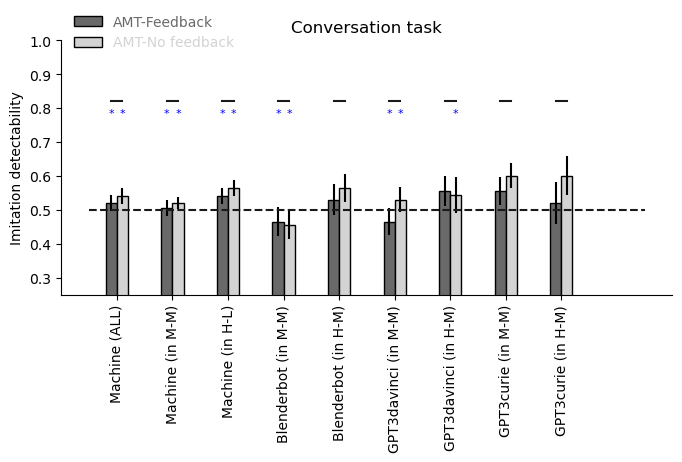

In [17]:
key = 'prolific'
bonferroni =  0
if bonferroni == 1: 
    ending = 'bonferroni'
else:
    ending = 'normal'
condition_chosen_list = ['feedback','nofeedback']
plotpathname = './plots_elisa/Task3_' + key + '_Feedback_vs_Nofeedback_human_judge_' +  ending #for saving the plots
facebarcolor = ['dimgray','lightgrey']
TextFilePath = './savedResults_elisa/Task3_' + key + '_'    



plot_res_demographics(condition_chosen_list , TextFilePath, plotpathname,facebarcolor, bonferroni)

In [4]:
def plot_res_demographics(condition_chosen_list, TextFilePath, plotname, facebarcolor, bonferroni):
    
    compiledAllConds = {}
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    
    # Store data for computing statistics
    Pdata = {}  
    for i in range(3, len(modelist)):  # Starting from 'Machine (all)'
        Pdata[modelist[i]] = {}
    
    for condition_chosen in condition_chosen_list:
        print('loading results for condition', condition_chosen)

        if condition_chosen == 'mturk':
            print('loading results for condition', condition_chosen)

            TextFilePath = './savedResults/Task3_' 

            # Load all the necessary files as in the original second code
            filename = TextFilePath + condition_chosen + '_HclassH.txt'
            H_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIclassAI.txt'
            AI_responses_all = np.loadtxt(filename)
            
            # Continue with all other file loading as in the original second code
            filename = TextFilePath + condition_chosen+ '_HinHHclassH.txt'
            H_inHH_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI.txt'
            AI_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_HinHAIclassH.txt'
            H_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI.txt'
            AI_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI.txt'
            AIb_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI.txt'
            AIb_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI.txt'
            AId_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI.txt'
            AId_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI.txt'
            AIc_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI.txt'
            AIc_inHAI_responses_all = np.loadtxt(filename)

            # Load standard deviation data
            filename = TextFilePath + condition_chosen + '_AIclassAI_top1std.txt'
            AI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_top1std.txt'
            AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_top1std.txt'
            AI_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_top1std.txt'
            AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_top1std.txt'
            AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_top1std.txt'
            AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_top1std.txt'
            AId_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_top1std.txt'
            AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_top1std.txt'
            AIc_inHAI_responses_all_top1std = np.loadtxt(filename)


        else:
            TextFilePath = './savedResults_elisa/Task3_' 
        
            # Load all the necessary files as in the original second code
            filename = TextFilePath + condition_chosen + '_HclassH_all.txt'
            H_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIclassAI_all.txt'
            AI_responses_all = np.loadtxt(filename)
            
            # Continue with all other file loading as in the original second code
            filename = TextFilePath + condition_chosen+ '_HinHHclassH_all.txt'
            H_inHH_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_all.txt'
            AI_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_HinHAIclassH_all.txt'
            H_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_all.txt'
            AI_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_all.txt'
            AIb_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_all.txt'
            AIb_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_all.txt'
            AId_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_all.txt'
            AId_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_all.txt'
            AIc_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_all.txt'
            AIc_inHAI_responses_all = np.loadtxt(filename)

            # Load standard deviation data
            filename = TextFilePath + condition_chosen + '_AIclassAI_top1std_all.txt'
            AI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_top1std_all.txt'
            AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_top1std_all.txt'
            AI_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_top1std.txt'
            AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_top1std.txt'
            AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_top1std.txt'
            AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_top1std.txt'
            AId_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_top1std.txt'
            AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_top1std.txt'
            AIc_inHAI_responses_all_top1std = np.loadtxt(filename)


        top1std = [AI_responses_all_top1std,
        AI_inAIAI_responses_all_top1std,
        AI_inHAI_responses_all_top1std,
        AIb_inAIAI_responses_all_top1std,
        AIb_inHAI_responses_all_top1std,
        AId_inAIAI_responses_all_top1std,
        AId_inHAI_responses_all_top1std,
        AIc_inAIAI_responses_all_top1std,
        AIc_inHAI_responses_all_top1std]

        print('results loaded')        

        # Compute confusion matrix
        result_conf_mat = np.zeros((len(modelist),2),'float32')
        result_conf_mat[0][0] = H_responses_all
        result_conf_mat[0][1] = 1-H_responses_all
        result_conf_mat[1][0] = H_inHH_responses_all
        result_conf_mat[1][1] = 1-H_inHH_responses_all
        result_conf_mat[2][0] = H_inHAI_responses_all
        result_conf_mat[2][1] = 1-H_inHAI_responses_all
        result_conf_mat[3][0] = 1-AI_responses_all
        result_conf_mat[3][1] = AI_responses_all
        result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
        result_conf_mat[4][1] = AI_inAIAI_responses_all
        result_conf_mat[5][0] = 1-AI_inHAI_responses_all
        result_conf_mat[5][1] = AI_inHAI_responses_all
        result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
        result_conf_mat[6][1] = AIb_inAIAI_responses_all
        result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
        result_conf_mat[7][1] = AIb_inHAI_responses_all
        result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
        result_conf_mat[8][1] = AId_inAIAI_responses_all
        result_conf_mat[9][0] = 1-AId_inHAI_responses_all
        result_conf_mat[9][1] = AId_inHAI_responses_all
        result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
        result_conf_mat[10][1] = AIc_inAIAI_responses_all
        result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
        result_conf_mat[11][1] = AIc_inHAI_responses_all
        result_conf_mat = np.around(result_conf_mat, decimals=2)

        # Calculate top1 accuracy as in the second code
        top1 = []
        for i in range(2, len(modelist)-1):
            top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
            
        # THIS IS THE KEY ADDITION: Load individual data points for statistical analysis
        for i in range(3, len(modelist)):
            model_name = modelist[i]
            
            # Determine the file prefix based on model name
            if model_name == 'Machine (all)':
                file_prefix = 'AI'
            elif 'Blenderbot' in model_name:
                file_prefix = 'AIb'
            elif 'GPT3davinci' in model_name:
                file_prefix = 'AId'
            elif 'GPT3curie' in model_name:
                file_prefix = 'AIc'
            else:
                file_prefix = 'AI'  # Default
            
            # Determine the context suffix based on model name
            if 'Machine-Machine' in model_name:
                context_suffix = 'inAIAI'
            elif 'H-Machine' in model_name:
                context_suffix = 'inHAI'
            else:
                context_suffix = ''  # For "all" categories
            
            # Load the individual data points
            try:
                # Example filename: Task3_mturk_AIbinAIAIclassAI_all_acc_per_image_feedback.txt
                # Adjust this pattern to match your file naming convention
                if condition_chosen == 'mturk': 
                    filename = TextFilePath + condition_chosen+ f'_{file_prefix}{context_suffix}classAI_acc_per_image.txt'
                #print(f"Loading individual data for {model_name}, condition {condition_chosen} from {filename}")
                else: 
                    filename = TextFilePath + condition_chosen+ f'_{file_prefix}{context_suffix}classAI_all_acc_per_image.txt'

                # Load the raw data points (0s and 1s indicating correct/incorrect classifications)
                individual_data = np.loadtxt(filename)
                
                # Store in Pdata
                Pdata[model_name][condition_chosen] = individual_data
                
            except Exception as e:
                print(f"Error loading individual data for {model_name}, condition {condition_chosen}: {e}")
                # Fallback: use aggregated data
                print(f"Using aggregated value as fallback")
                Pdata[model_name][condition_chosen] = np.array([(result_conf_mat[0][0]+result_conf_mat[i-3][1])/2])

        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen + '_std'] = top1std
    
    # Statistical analysis section (adapted from first code)
    chancePval = []
    groupPval = []
    chanceRealPval = []
    groupRealPval = []
    
    # Functions from first code for statistical calculations
    def ComputeStats_group1(data, chance_level=0.5):
        """Compute one-sample t-test against chance level"""
        t_stat, p_val = ttest_1samp(data, chance_level)
        dof = len(data) - 1
        return ('', p_val, t_stat, dof)
    
    def ComputeStats_group2(data1, data2):
        """Compute independent t-test between two groups"""
        t_stat, p_val = ttest_ind(data1, data2, equal_var=False)
        dof = len(data1) + len(data2) - 2
        return ('', p_val, t_stat, dof)
    
    def ComputeStats_group3(data_dict):
        """Compute ANOVA for three or more groups"""
        # Extract data into lists
        data_lists = list(data_dict.values())
        
        # Run one-way ANOVA
        f_val, p_val = f_oneway(*data_lists)
        
        # Calculate degrees of freedom
        between_df = len(data_lists) - 1
        within_df = sum(len(data) for data in data_lists) - len(data_lists)
        
        return ('', between_df, within_df, f_val, p_val)
    
    def outputIconForStats(p_val):
        """Return appropriate statistical significance icon"""
        if p_val < 0.001:
            return '***'
        elif p_val < 0.01:
            return '**'
        elif p_val < 0.05:
            return '*'
        else:
            return ''
    
    # Compute statistics for each model
    for i in range(3, len(modelist)):  # Starting from Machine (all)
        for condition_chosen in condition_chosen_list:        
            # Compute against chance 50%
            d_cond = Pdata[modelist[i]][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chanceRealPval.append(pval)
            
        # Compare between conditions if multiple conditions
        if len(condition_chosen_list) == 2:
            data_d1 = Pdata[modelist[i]][condition_chosen_list[0]]
            data_d2 = Pdata[modelist[i]][condition_chosen_list[1]]
            icon, pval, Tval, dof = ComputeStats_group2(data_d1, data_d2)
            groupRealPval.append(pval)
        elif len(condition_chosen_list) >= 3:
            icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(Pdata[modelist[i]])
            groupRealPval.append(pval)
    
    compiled_pvals = np.array(chanceRealPval + groupRealPval)
        
    # Filter out NaN values before correction
    valid_indices = ~np.isnan(compiled_pvals)
    valid_pvals = compiled_pvals[valid_indices]
        
    if bonferroni == 1:
        # Apply Bonferroni correction
        if len(valid_pvals) > 0:
            try:
                # Try with all parameters
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni',
                    is_sorted=False, returnsorted=False
                )
            except TypeError:
                # If that fails, try with only the essential parameters
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni'
                )
                
            # Put corrected values back in the original array structure
            correctedPvals = np.full(compiled_pvals.shape, np.nan)
            correctedPvals[valid_indices] = corrected_valid_pvals
                
            print('Bonferroni correction applied')
            print('Corrected Alpha:', alphacBonf)
        else:
            correctedPvals = compiled_pvals
            print('No valid p-values to correct with Bonferroni')
    else:
        # No correction - use original p-values
        correctedPvals = compiled_pvals
        print('No correction applied to p-values - using raw p-values')
        
    # Convert to list for compatibility with the rest of the code
    correctedPvals = list(correctedPvals)
    
    # Convert p-values to significance icons, handling NaN values
    chancePval = []
    groupPval = []

    if len(correctedPvals) >= len(chanceRealPval) + len(groupRealPval):
        # Process chance comparison p-values
        for i in range(len(chanceRealPval)):
            pval = correctedPvals[i]
            if np.isnan(pval):
                chancePval.append('n.s.')
            else:
                chancePval.append(outputIconForStats(pval))
        
        # Process group comparison p-values
        for i in range(len(groupRealPval)):
            pval = correctedPvals[i + len(chanceRealPval)]
            if np.isnan(pval):
                groupPval.append('n.s.')
            else:
                groupPval.append(outputIconForStats(pval))
    else:
        # Handle case where correctedPvals doesn't have enough values
        # (could happen if all p-values were NaN or other processing errors)
        print("Warning: Not enough corrected p-values available")
        chancePval = ['n.s.'] * len(chanceRealPval)
        groupPval = ['n.s.'] * len(groupRealPval)

    print("Chance p-values:", chancePval)
    print("Group p-values:", groupPval)

        # Plotting code (matching colleague's format)
    # x-axis
    years = list(range(1, len(modelist)-2))
    

    modelist2 = ['Human (ALL)',
           'Human (in H-H)',
           'Human (in H-M)',
           'Machine (ALL)',
            'Machine (in M-M)',
            'Machine (in H-L)',
            'Blenderbot (in M-M)',
            'Blenderbot (in H-M)',
            'GPT3davinci (in M-M)',
            'GPT3davinci (in H-M)',
            'GPT3curie (in M-M)',
            'GPT3curie (in H-M)',
           ]
    
    strtask = modelist2[3:]  # Skip the first three models

    # Figure Size
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(strtask))  # the label locations
    point_x = []  # for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5
    else:
        multiplier = -1

    # Optional yellow patch for chance level highlighting (commented out in colleague's code)
    # ax.add_patch(Rectangle((-0.5, 0.45), len(strtask), 0.1, facecolor='yellow'))
    
    # Create bar plots for each condition
    for ind, condition_chosen in enumerate(condition_chosen_list):
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        attribute = condition_chosen
        if condition_chosen == "mturk":
            attribute = 'mturk'
        else: 
            attribute = 'AI experts'
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr=measurement_std, width=width,
                     label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')
        point_x.extend((x+offset).tolist())
        multiplier += 1
    
    # Add statistical significance annotations
    point_x.sort(reverse=False)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, color='blue', horizontalalignment='center', transform=ax.get_xaxis_transform())
    
    ax.set_xticks(x, strtask)
    ax.legend(loc='upper left', ncol=1, frameon=False, labelcolor=facebarcolor, bbox_to_anchor=(0, 1.15))
    plt.title('Conversation task')
    
    # Add horizontal lines and group comparison p-values
    totalPx = len(point_x)
    count = 0
    print(groupPval)
    for s1 in range(0, totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0, len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x / len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(np.array([starting_x, ending_x]),
                 np.arange(2)*0+0.82, 'k', label='chance (50%)')
        ax.text(center_x, .8, groupPval[count], color='red', fontsize=8, horizontalalignment='center', transform=ax.get_xaxis_transform())
        count = count + 1
    
    # Finalize plot
    plt.ylabel('Imitation detectability')
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90-degrees
    plt.ylim(0.25, 1)
    
    # Draw chance 0.5
    chancex = np.arange(len(years)+2)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    
    fig.tight_layout()
    fig.set_figwidth(7)
    fig.set_figheight(5)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Save plots
    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')
    
    # Optional additional save locations as in the first code
    # plt.savefig('./plots/'+plotname + '.pdf', bbox_inches='tight')
    # plt.savefig('./plots/'+plotname + '.png', bbox_inches='tight')
    # plt.savefig(XIAOROOT+plotname + '.pdf', bbox_inches='tight')
    # plt.savefig(XIAOROOT+plotname + '.eps', format='eps', bbox_inches='tight')
    
    plt.show()

In [5]:
import numpy as np
import json
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multitest import multipletests

loading results for condition mturk
loading results for condition mturk
results loaded
loading results for condition AIexperts
results loaded
No correction applied to p-values - using raw p-values
Chance p-values: ['***', '', '***', '', '***', '', '***', '***', '', '', '***', '', '', '', '***', '***', '***', '']
Group p-values: ['', '', '', '', '', '', '', '*', '']
['', '', '', '', '', '', '', '*', '']


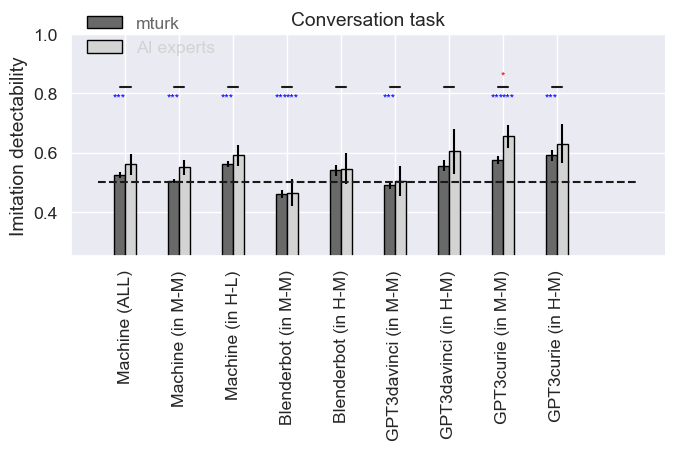

In [6]:
key = 'mturk'
bonferroni =  0
if bonferroni == 1: 
    ending = 'bonferroni'
else:
    ending = 'normal'
condition_chosen_list = ['mturk','AIexperts']
plotpathname = './plots_elisa/Task3_' + key + '_mturk_vs_AI_experts_' +  ending #for saving the plots
facebarcolor = ['dimgray','lightgrey']
TextFilePath = './savedResults_elisa/Task3_' + key + '_'    



plot_res_demographics(condition_chosen_list , TextFilePath, plotpathname,facebarcolor, bonferroni)

# Comparison MTurk with AI experts

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import font_manager
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multitest import multipletests
import os

# Define font properties
def setup_fonts():
    """Set up Arial fonts for plots"""
    arial_path = font_manager.findfont('Arial')
    arialbold_path = font_manager.findfont('Arial Bold')
    
    prop_arial = font_manager.FontProperties(fname=arial_path)
    prop_arialbold = font_manager.FontProperties(fname=arialbold_path)
    
    return prop_arial, prop_arialbold

def ComputeStats_group1(data, chance_level=0.5):
    """Compute one-sample t-test against chance level"""
    t_stat, p_val = ttest_1samp(data, chance_level)
    dof = len(data) - 1
    return ('', p_val, t_stat, dof)

# Bootstrap functions
def bootstrap_ttest(data1, data2, n_bootstrap=1000, random_state=None):
    """
    Performs a bootstrap t-test for comparing two independent samples.
    Uses the minimum sample size for both groups and calculates p-value 
    by determining if zero is within the distribution of differences.
    """
    # Set random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)
    
    # Calculate observed difference in means
    observed_diff = np.mean(data1) - np.mean(data2)
    
    # Store bootstrap differences
    bootstrap_diffs = np.zeros(n_bootstrap)
    
    # Only sample as much as the minimal group
    min_size = min(len(data1), len(data2))
    
    # Bootstrap resampling
    for i in range(n_bootstrap):
        # Resample with replacement from each dataset
        resample1 = np.random.choice(data1, size=min_size, replace=True)
        resample2 = np.random.choice(data2, size=min_size, replace=True)
        
        # Calculate and store the mean difference for this bootstrap sample
        bootstrap_diffs[i] = np.mean(resample1) - np.mean(resample2)
    
    # Calculate p-value based on where 0 falls in the bootstrap distribution
    # Sort the bootstrap differences
    sorted_diffs = np.sort(bootstrap_diffs)
    
    # Find where 0 would be in the sorted distribution
    if 0 < sorted_diffs[0]:  # 0 is below all values
        p_value = 1/n_bootstrap  # Smallest possible p-value
    elif 0 > sorted_diffs[-1]:  # 0 is above all values
        p_value = 1/n_bootstrap  # Smallest possible p-value
    else:
        # Find percentile of 0 in the distribution
        zero_percentile = np.sum(sorted_diffs < 0) / n_bootstrap
        # Two-tailed p-value: 2 * min(percentile, 1-percentile)
        p_value = 2 * min(zero_percentile, 1 - zero_percentile)
    
    # Calculate 95% confidence interval
    confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])
    
    # Calculate bootstrap standard error
    bootstrap_se = np.std(bootstrap_diffs, ddof=1)
    
    return {
        'mean_diff': observed_diff,
        'p_value': p_value,
        'confidence_interval': confidence_interval,
        'bootstrap_diffs': bootstrap_diffs,
        'bootstrap_se': bootstrap_se
    }

def bootstrap_sample_statistic(data, statistic=np.mean, n_bootstrap=1000, random_state=None):
    """
    Generate bootstrap distribution for a statistic on a single sample.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n = len(data)
    bootstrap_stats = np.zeros(n_bootstrap)
    
    for i in range(n_bootstrap):
        resample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats[i] = statistic(resample)
    
    confidence_interval = np.percentile(bootstrap_stats, [2.5, 97.5])
    bootstrap_se = np.std(bootstrap_stats, ddof=1)
    
    return {
        'bootstrap_stats': bootstrap_stats,
        'confidence_interval': confidence_interval,
        'bootstrap_se': bootstrap_se
    }

def bootstrap_against_chance(data, chance_level=0.5, n_bootstrap=1000, random_state=None):
    """
    Test if data is significantly different from chance using bootstrap.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n = len(data)
    observed_mean = np.mean(data)
    observed_diff = observed_mean - chance_level
    
    # Bootstrap resampling
    bootstrap_result = bootstrap_sample_statistic(data, np.mean, n_bootstrap, random_state)
    bootstrap_means = bootstrap_result['bootstrap_stats']
    
    # Calculate p-value (two-tailed)
    p_value = np.mean(np.abs(bootstrap_means - chance_level) >= np.abs(observed_diff))
    
    return p_value, bootstrap_result

def outputIconForStats(p_val):
    """Return appropriate statistical significance icon"""
    #if p_val < 0.001:
    #    return '***'
    #elif p_val < 0.01:
    #    return '**'
    if p_val < 0.05:
        return '*'
    else:
        return ''

def plot_res_demographics_bootstrap(condition_chosen_list, TextFilePath, plotname, facebarcolor, bonferroni, n_bootstrap=1000, random_state=42):
    """
    Plot demographic results using bootstrap for statistical analysis.
    """
    # Set up fonts
    prop_arial, prop_arialbold = setup_fonts()
    
    compiledAllConds = {}
    
    modelist = ['Human (all)',
           'Human (in H-H)',
           'Human (in H-Machine)',
           'Machine (all)',
            'Machine (in Machine-Machine)',
            'Machine (in H-Machine)',
            'Blenderbot (in Machine-Machine)',
            'Blenderbot (in H-Machine)',
            'GPT3davinci (in Machine-Machine)',
            'GPT3davinci (in H-Machine)',
            'GPT3curie (in Machine-Machine)',
            'GPT3curie (in H-Machine)',
           ]
    
    # Store data for computing statistics
    Pdata = {}  
    for i in range(3, len(modelist)):  # Starting from 'Machine (all)'
        Pdata[modelist[i]] = {}
    
    for condition_chosen in condition_chosen_list:
        print('loading results for condition', condition_chosen)

        if condition_chosen == 'mturk':
            print('loading results for condition', condition_chosen)

            TextFilePath = './savedResults/Task3_' 

            # Load all the necessary files as in the original second code
            filename = TextFilePath + condition_chosen + '_HclassH.txt'
            H_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIclassAI.txt'
            AI_responses_all = np.loadtxt(filename)
            
            # Continue with all other file loading as in the original second code
            filename = TextFilePath + condition_chosen+ '_HinHHclassH.txt'
            H_inHH_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI.txt'
            AI_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_HinHAIclassH.txt'
            H_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI.txt'
            AI_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI.txt'
            AIb_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI.txt'
            AIb_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI.txt'
            AId_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI.txt'
            AId_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI.txt'
            AIc_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI.txt'
            AIc_inHAI_responses_all = np.loadtxt(filename)

            # Load standard deviation data
            filename = TextFilePath + condition_chosen + '_AIclassAI_top1std.txt'
            AI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_top1std.txt'
            AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_top1std.txt'
            AI_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_top1std.txt'
            AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_top1std.txt'
            AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_top1std.txt'
            AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_top1std.txt'
            AId_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_top1std.txt'
            AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_top1std.txt'
            AIc_inHAI_responses_all_top1std = np.loadtxt(filename)


        else:
            TextFilePath = './savedResults_elisa/Task3_' 
        
            # Load all the necessary files as in the original second code
            filename = TextFilePath + condition_chosen + '_HclassH_all.txt'
            H_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIclassAI_all.txt'
            AI_responses_all = np.loadtxt(filename)
            
            # Continue with all other file loading as in the original second code
            filename = TextFilePath + condition_chosen+ '_HinHHclassH_all.txt'
            H_inHH_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_all.txt'
            AI_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_HinHAIclassH_all.txt'
            H_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_all.txt'
            AI_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_all.txt'
            AIb_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_all.txt'
            AIb_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_all.txt'
            AId_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_all.txt'
            AId_inHAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_all.txt'
            AIc_inAIAI_responses_all = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_all.txt'
            AIc_inHAI_responses_all = np.loadtxt(filename)

            # Load standard deviation data
            filename = TextFilePath + condition_chosen + '_AIclassAI_top1std_all.txt'
            AI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinAIAIclassAI_top1std_all.txt'
            AI_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIinHAIclassAI_top1std_all.txt'
            AI_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinAIAIclassAI_top1std.txt'
            AIb_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIbinHAIclassAI_top1std.txt'
            AIb_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinAIAIclassAI_top1std.txt'
            AId_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIdinHAIclassAI_top1std.txt'
            AId_inHAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinAIAIclassAI_top1std.txt'
            AIc_inAIAI_responses_all_top1std = np.loadtxt(filename)

            filename = TextFilePath + condition_chosen + '_AIcinHAIclassAI_top1std.txt'
            AIc_inHAI_responses_all_top1std = np.loadtxt(filename)


        top1std = [AI_responses_all_top1std,
        AI_inAIAI_responses_all_top1std,
        AI_inHAI_responses_all_top1std,
        AIb_inAIAI_responses_all_top1std,
        AIb_inHAI_responses_all_top1std,
        AId_inAIAI_responses_all_top1std,
        AId_inHAI_responses_all_top1std,
        AIc_inAIAI_responses_all_top1std,
        AIc_inHAI_responses_all_top1std]

        print('results loaded')        

        # Compute confusion matrix
        result_conf_mat = np.zeros((len(modelist),2),'float32')
        result_conf_mat[0][0] = H_responses_all
        result_conf_mat[0][1] = 1-H_responses_all
        result_conf_mat[1][0] = H_inHH_responses_all
        result_conf_mat[1][1] = 1-H_inHH_responses_all
        result_conf_mat[2][0] = H_inHAI_responses_all
        result_conf_mat[2][1] = 1-H_inHAI_responses_all
        result_conf_mat[3][0] = 1-AI_responses_all
        result_conf_mat[3][1] = AI_responses_all
        result_conf_mat[4][0] = 1-AI_inAIAI_responses_all
        result_conf_mat[4][1] = AI_inAIAI_responses_all
        result_conf_mat[5][0] = 1-AI_inHAI_responses_all
        result_conf_mat[5][1] = AI_inHAI_responses_all
        result_conf_mat[6][0] = 1-AIb_inAIAI_responses_all
        result_conf_mat[6][1] = AIb_inAIAI_responses_all
        result_conf_mat[7][0] = 1-AIb_inHAI_responses_all
        result_conf_mat[7][1] = AIb_inHAI_responses_all
        result_conf_mat[8][0] = 1-AId_inAIAI_responses_all
        result_conf_mat[8][1] = AId_inAIAI_responses_all
        result_conf_mat[9][0] = 1-AId_inHAI_responses_all
        result_conf_mat[9][1] = AId_inHAI_responses_all
        result_conf_mat[10][0] = 1-AIc_inAIAI_responses_all
        result_conf_mat[10][1] = AIc_inAIAI_responses_all
        result_conf_mat[11][0] = 1-AIc_inHAI_responses_all
        result_conf_mat[11][1] = AIc_inHAI_responses_all
        result_conf_mat = np.around(result_conf_mat, decimals=2)

        # Calculate top1 accuracy as in the second code
        top1 = []
        for i in range(2, len(modelist)-1):
            top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
            
        # Get base accuracies from the confusion matrix for this condition
        base_accuracies = [
            AI_responses_all,
            AI_inAIAI_responses_all, 
            AI_inHAI_responses_all,
            AIb_inAIAI_responses_all,
            AIb_inHAI_responses_all,
            AId_inAIAI_responses_all,
            AId_inHAI_responses_all,
            AIc_inAIAI_responses_all,
            AIc_inHAI_responses_all
        ]
        
        # Different sample sizes based on condition
        if condition_chosen == 'mturk':
            base_n = 2000  # Larger sample for MTurk
        else:  # AIexperts
            base_n = 150   # Smaller sample for AI experts
            
        # THIS IS THE KEY ADDITION: Load individual data points for statistical analysis
        for i in range(3, len(modelist)):
            model_name = modelist[i]
            model_idx = i - 3
            
            # Determine the file prefix based on model name
            if model_name == 'Machine (all)':
                file_prefix = 'AI'
            elif 'Blenderbot' in model_name:
                file_prefix = 'AIb'
            elif 'GPT3davinci' in model_name:
                file_prefix = 'AId'
            elif 'GPT3curie' in model_name:
                file_prefix = 'AIc'
            else:
                file_prefix = 'AI'  # Default
            
            # Determine the context suffix based on model name
            if 'Machine-Machine' in model_name:
                context_suffix = 'inAIAI'
            elif 'H-Machine' in model_name or 'H-L' in model_name:
                context_suffix = 'inHAI'
            else:
                context_suffix = ''  # For "all" categories
            
            # Load the individual data points
            try:
                # Example filename: Task3_mturk_AIbinAIAIclassAI_all_acc_per_image_feedback.txt
                if condition_chosen == 'mturk': 
                    filename = TextFilePath + condition_chosen+ f'_{file_prefix}{context_suffix}classAI_acc_per_image.txt'
                else: 
                    filename = TextFilePath + condition_chosen+ f'_{file_prefix}{context_suffix}classAI_all_acc_per_image.txt'

                # Load the raw data points
                individual_data = np.loadtxt(filename)
                
                # Store in Pdata
                Pdata[model_name][condition_chosen] = individual_data
                print(f"Loaded {len(individual_data)} samples for {model_name}, condition {condition_chosen}")
                print(f"  Mean accuracy: {np.mean(individual_data):.4f}")
                
            except Exception as e:
                print(f"Error loading individual data for {model_name}, condition {condition_chosen}: {e}")
                # Fallback: create synthetic data based on the overall accuracy
                print(f"Creating synthetic data as fallback")
                accuracy = base_accuracies[model_idx]
                n_samples = base_n + np.random.randint(-50, 50)
                individual_data = np.random.binomial(1, accuracy, size=n_samples)
                Pdata[model_name][condition_chosen] = individual_data
                print(f"Generated {len(individual_data)} samples with mean accuracy: {np.mean(individual_data):.4f}")
        
        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen + '_std'] = top1std
    
    # ----- BOOTSTRAP STATISTICS SECTION ------
    
    # Storage for bootstrap results
    bootstrap_results = {}
    chancePval = []
    groupPval = []
    chanceRealPval = []
    groupRealPval = []
    
    # Compute statistics for each model
    for i in range(3, len(modelist)):  # Starting from Machine (all)
        model_name = modelist[i]
        bootstrap_results[model_name] = {}
        
        for condition_chosen in condition_chosen_list:
            # Get the data
            data = Pdata[model_name][condition_chosen]

            _, p_val, t_stat, dof = ComputeStats_group1(data, chance_level=0.5)
        
            chanceRealPval.append(p_val)
            print(f"Model: {model_name}, Condition: {condition_chosen}")
            print(f"  t({dof}) = {t_stat:.3f}, p = {p_val:.4f}")
            
            # # Bootstrap test against chance level
            # pval, bootstrap_result = bootstrap_against_chance(
            #     data, chance_level=0.5, n_bootstrap=n_bootstrap, random_state=random_state)
            
            #chanceRealPval.append(pval)

            t_test_result = {
            't_stat': t_stat,
            'p_value': p_val,
            'dof': dof,
            # We won't have a bootstrap distribution, so we need an alternative for std error
            # We can calculate it directly:
            'stderr': np.std(data, ddof=1) / np.sqrt(len(data))
            }
            
            # Store bootstrap results
            bootstrap_results[model_name][condition_chosen] = t_test_result
        
        # Compare between conditions if multiple conditions
        if len(condition_chosen_list) == 2:
            data_d1 = Pdata[model_name][condition_chosen_list[0]]
            data_d2 = Pdata[model_name][condition_chosen_list[1]]
            
            # Print sample sizes
            print(f"Model: {model_name}, Sample sizes: {len(data_d1)} vs {len(data_d2)}")
            
            # Bootstrap comparison between conditions
            boot_result = bootstrap_ttest(
                data_d1, data_d2, n_bootstrap=n_bootstrap, random_state=random_state)
            
            pval = boot_result['p_value']
            bootstrap_results[model_name]['condition_comparison'] = boot_result
            
            groupRealPval.append(pval)
            
            # Print comparison results
            print(f"  Bootstrap p-value: {pval:.4f}")
            print(f"  Mean difference: {boot_result['mean_diff']:.4f}")
            print(f"  95% CI: [{boot_result['confidence_interval'][0]:.4f}, {boot_result['confidence_interval'][1]:.4f}]")
    
    # Bonferroni correction
    compiled_pvals = np.array(chanceRealPval + groupRealPval)
    
    # Filter out NaN values before correction
    valid_indices = ~np.isnan(compiled_pvals)
    valid_pvals = compiled_pvals[valid_indices]
    
    if bonferroni == 1:
        # Apply Bonferroni correction
        if len(valid_pvals) > 0:
            try:
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni',
                    is_sorted=False, returnsorted=False
                )
            except TypeError:
                pvalFlags, corrected_valid_pvals, _, alphacBonf = multipletests(
                    valid_pvals, alpha=0.05, method='bonferroni'
                )
                
            # Put corrected values back in the original array structure
            correctedPvals = np.full(compiled_pvals.shape, np.nan)
            correctedPvals[valid_indices] = corrected_valid_pvals
                
            print('Bonferroni correction applied')
            print('Corrected Alpha:', alphacBonf)
        else:
            correctedPvals = compiled_pvals
            print('No valid p-values to correct with Bonferroni')
    else:
        # No correction - use original p-values
        correctedPvals = compiled_pvals
        print('No correction applied to p-values - using raw p-values')
    
    # Convert to list
    correctedPvals = list(correctedPvals)
    
    # Convert p-values to significance icons
    chancePval = []
    groupPval = []

    if len(correctedPvals) >= len(chanceRealPval) + len(groupRealPval):
        # Process chance comparison p-values
        for i in range(len(chanceRealPval)):
            pval = correctedPvals[i]
            if np.isnan(pval):
                chancePval.append('n.s.')
            else:
                chancePval.append(outputIconForStats(pval))
        
        # Process group comparison p-values
        for i in range(len(groupRealPval)):
            pval = correctedPvals[i + len(chanceRealPval)]
            if np.isnan(pval):
                groupPval.append('n.s.')
            else:
                groupPval.append(outputIconForStats(pval))
    else:
        # Handle case where correctedPvals doesn't have enough values
        print("Warning: Not enough corrected p-values available")
        chancePval = ['n.s.'] * len(chanceRealPval)
        groupPval = ['n.s.'] * len(groupRealPval)

    print("Chance p-values:", chancePval)
    print("Group p-values:", groupPval)

    # ----- PLOTTING SECTION ------
    
    # Create axis arrays
    years = list(range(1, len(modelist)-2))
    
    modelist2 = ['Human (ALL)',
           'Human (in H-H)',
           'Human (in H-M)',
           'Machine (ALL)',
            'Machine (in M-M)',
            'Machine (in H-L)',
            'Blenderbot (in M-M)',
            'Blenderbot (in H-M)',
            'GPT3davinci (in M-M)',
            'GPT3davinci (in H-M)',
            'GPT3curie (in M-M)',
            'GPT3curie (in H-M)',
           ]
    
    strtask = modelist2[3:]  # Skip the first three models

    # Create figure
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(strtask))  # the label locations
    point_x = []  # for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5
    else:
        multiplier = -1
    
    # Create bar plots for each condition
    for ind, condition_chosen in enumerate(condition_chosen_list):
        measurement = compiledAllConds[condition_chosen]
        
        # Instead of using the original std, use bootstrap standard errors
        bootstrap_stderr = []
        
        for i, model_name in enumerate(modelist[3:]):
            # Get the bootstrap result for this model
            t_test_result = bootstrap_results[model_name][condition_chosen]
            
            # Use the bootstrap standard error
            bootstrap_stderr.append(t_test_result['stderr'])
        
        attribute = condition_chosen
        if condition_chosen == "mturk":
            attribute = 'AMT'
        else: 
            attribute = 'AI experts'
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr=bootstrap_stderr, width=width,
                     label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')
        
        point_x.extend((x+offset).tolist())
        multiplier += 1
    
    # Apply font styles to all text elements
    plt.rcParams['font.family'] = 'Arial'
    
    # Add statistical significance annotations
    point_x.sort(reverse=False)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, color='blue', 
                horizontalalignment='center', transform=ax.get_xaxis_transform(),
                fontproperties=prop_arial)
    
    ax.set_xticks(x, strtask)
    
    # Apply font to x-tick labels
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(prop_arial)
        tick.set_fontsize(10)
        
    # Apply font to y-tick labels
    for tick in ax.get_yticklabels():
        tick.set_fontproperties(prop_arial)
        tick.set_fontsize(10)
    
    # Configure legend with custom font
    ax.legend(loc='upper left', ncol=1, frameon=False, labelcolor=facebarcolor, 
              bbox_to_anchor=(0, 1.15), prop=prop_arial)
    
    # Set title with custom font
    plt.title('Conversation task', fontproperties=prop_arialbold, fontsize=14)
    
    # Add horizontal lines and group comparison p-values
    totalPx = len(point_x)
    count = 0
    for s1 in range(0, totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0, len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x / len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(np.array([starting_x, ending_x]),
                 np.arange(2)*0+0.82, 'k', label='chance (50%)')
    
    # Finalize plot
    plt.ylabel('Imitation detectability')
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90-degrees
    plt.ylim(0.25, 1)
    
    # Draw chance 0.5
    chancex = np.arange(len(years)+2)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    
    fig.tight_layout()
    fig.set_figwidth(7)
    fig.set_figheight(5)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Save plots
    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')

In [4]:
plotpathname

'./plots_elisa/Task3_mturk_mturk_vs_AI_experts_bonferronibootstrap'

loading results for condition mturk
loading results for condition mturk
results loaded
Loaded 4584 samples for Machine (all), condition mturk
  Mean accuracy: 0.4708
Loaded 2998 samples for Machine (in Machine-Machine), condition mturk
  Mean accuracy: 0.4326
Loaded 1586 samples for Machine (in H-Machine), condition mturk
  Mean accuracy: 0.5429
Loaded 1038 samples for Blenderbot (in Machine-Machine), condition mturk
  Mean accuracy: 0.3372
Loaded 505 samples for Blenderbot (in H-Machine), condition mturk
  Mean accuracy: 0.4990
Loaded 998 samples for GPT3davinci (in Machine-Machine), condition mturk
  Mean accuracy: 0.3958
Loaded 542 samples for GPT3davinci (in H-Machine), condition mturk
  Mean accuracy: 0.5314
Loaded 962 samples for GPT3curie (in Machine-Machine), condition mturk
  Mean accuracy: 0.5738
Loaded 539 samples for GPT3curie (in H-Machine), condition mturk
  Mean accuracy: 0.5955
loading results for condition AIexperts
results loaded
Loaded 377 samples for Machine (all), 

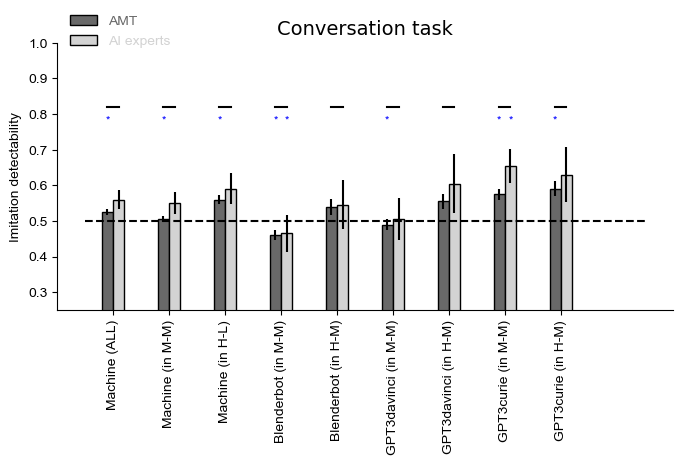

In [4]:
key = 'mturk'
bonferroni =  1
if bonferroni == 1: 
    ending = 'bonferroni'
else:
    ending = 'normal'
condition_chosen_list = ['mturk','AIexperts']
plotpathname = './plots_elisa/Task3_' + key + '_mturk_vs_AI_experts_' +  ending + '_bootstrap'#for saving the plots
facebarcolor = ['dimgray','lightgrey']
TextFilePath = './savedResults_elisa/Task3_' + key + '_'    



plot_res_demographics_bootstrap(condition_chosen_list , TextFilePath, plotpathname,facebarcolor, bonferroni)